# OpenJij Benchmark Visualizations

This notebook generates high-resolution visualizations from Phase 1 and Phase 2 benchmark results.

**Input Files:**
- `data/results/phase1_openjij_parameters.xlsx` - QUBO parameter optimization results
- `data/results/phase2_openjij_parameters.xlsx` - OpenJij annealing parameter optimization results
- `data/results/pipeline_experiment_results.csv` - Importance metrics comparison results

## Setup: Imports and Configuration

In [19]:
# Add project root to Python path
import sys
from pathlib import Path

project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root))

print(f"✓ Project root: {project_root}")

✓ Project root: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set high-quality plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['axes.labelsize'] = 13
plt.rcParams['axes.titlesize'] = 14

sns.set_style('whitegrid')

print("✓ All libraries imported successfully")
print("✓ High-resolution plotting configured (DPI=300, thick lines)")

✓ All libraries imported successfully
✓ High-resolution plotting configured (DPI=300, thick lines)


## Load Phase 1 and Phase 2 Results

In [21]:
# Define paths
results_dir = project_root / 'data' / 'results'
phase1_file = results_dir / 'phase1_openjij_parameters.xlsx'
phase2_file = results_dir / 'phase2_openjij_parameters.xlsx'
output_dir = results_dir / 'visualizations'
output_dir.mkdir(parents=True, exist_ok=True)

print("Loading benchmark results...")

# Load Phase 1 results
if not phase1_file.exists():
    raise FileNotFoundError(f"Phase 1 file not found: {phase1_file}")
phase1_df = pd.read_excel(phase1_file)
print(f"✓ Loaded Phase 1 results: {len(phase1_df)} configurations")
print(f"  Columns: {phase1_df.columns.tolist()}")

# Load Phase 2 results
if not phase2_file.exists():
    raise FileNotFoundError(f"Phase 2 file not found: {phase2_file}")
phase2_df = pd.read_excel(phase2_file)
print(f"✓ Loaded Phase 2 results: {len(phase2_df)} configurations")
print(f"  Columns: {phase2_df.columns.tolist()}")

# Extract parameter values for Phase 1
k_values = sorted(phase1_df['k'].unique())
alpha_values = sorted(phase1_df['alpha'].unique())
penalty_values = sorted(phase1_df['penalty'].unique())

print(f"\nPhase 1 parameter ranges:")
print(f"  k: {k_values}")
print(f"  alpha: {alpha_values}")
print(f"  penalty: {penalty_values}")

# Extract parameter values for Phase 2
num_sweeps_values = sorted(phase2_df['num_sweeps'].unique())
num_reads_values = sorted(phase2_df['num_reads'].unique())
beta_values = sorted(phase2_df['beta'].unique())
gamma_values = sorted(phase2_df['gamma'].unique())

print(f"\nPhase 2 parameter ranges:")
print(f"  num_sweeps: {num_sweeps_values}")
print(f"  num_reads: {num_reads_values}")
print(f"  beta: {beta_values}")
print(f"  gamma: {gamma_values}")

print(f"\n✓ Output directory: {output_dir}")

Loading benchmark results...
✓ Loaded Phase 1 results: 96 configurations
  Columns: ['k', 'alpha', 'penalty', 'num_aps_selected', 'qubo_time_s', 'mean_3d_error_m', 'median_3d_error_m', 'floor_accuracy_0', 'floor_accuracy_1', 'floor_accuracy_2']
✓ Loaded Phase 2 results: 144 configurations
  Columns: ['num_sweeps', 'num_reads', 'beta', 'gamma', 'num_aps_selected', 'qubo_time_s', 'success_rate', 'tts_s', 'mean_3d_error_m', 'median_3d_error_m', 'floor_accuracy_0', 'floor_accuracy_1', 'floor_accuracy_2']

Phase 1 parameter ranges:
  k: [np.int64(15), np.int64(20), np.int64(25), np.int64(30), np.int64(35), np.int64(40), np.int64(45), np.int64(50)]
  alpha: [np.float64(0.7), np.float64(0.8), np.float64(0.9), np.float64(0.95)]
  penalty: [np.float64(1.5), np.float64(2.0), np.float64(2.5)]

Phase 2 parameter ranges:
  num_sweeps: [np.int64(100), np.int64(500), np.int64(1000), np.int64(2000)]
  num_reads: [np.int64(10), np.int64(50), np.int64(100)]
  beta: [np.float64(0.5), np.float64(1.0), np.

---
# Phase 1 Visualizations: QUBO Parameter Optimization

## Figure 1: Mean 3D Error vs Number of APs (k) for Different Alpha Values

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

for alpha in alpha_values:
    subset = phase1_df[phase1_df['alpha'] == alpha]
    # Aggregate across penalty values by taking the mean for each k
    grouped = subset.groupby('k')['mean_3d_error_m'].mean().reset_index()
    ax.plot(grouped['k'], grouped['mean_3d_error_m'], 
            marker='o', label=f'α={alpha}', linewidth=3)

ax.set_xlabel('k (Number of APs)', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'phase1_fig1_error_vs_k.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 1 saved: phase1_fig1_error_vs_k.png")

## Figure 2: Floor Accuracy vs Alpha for Different k Values

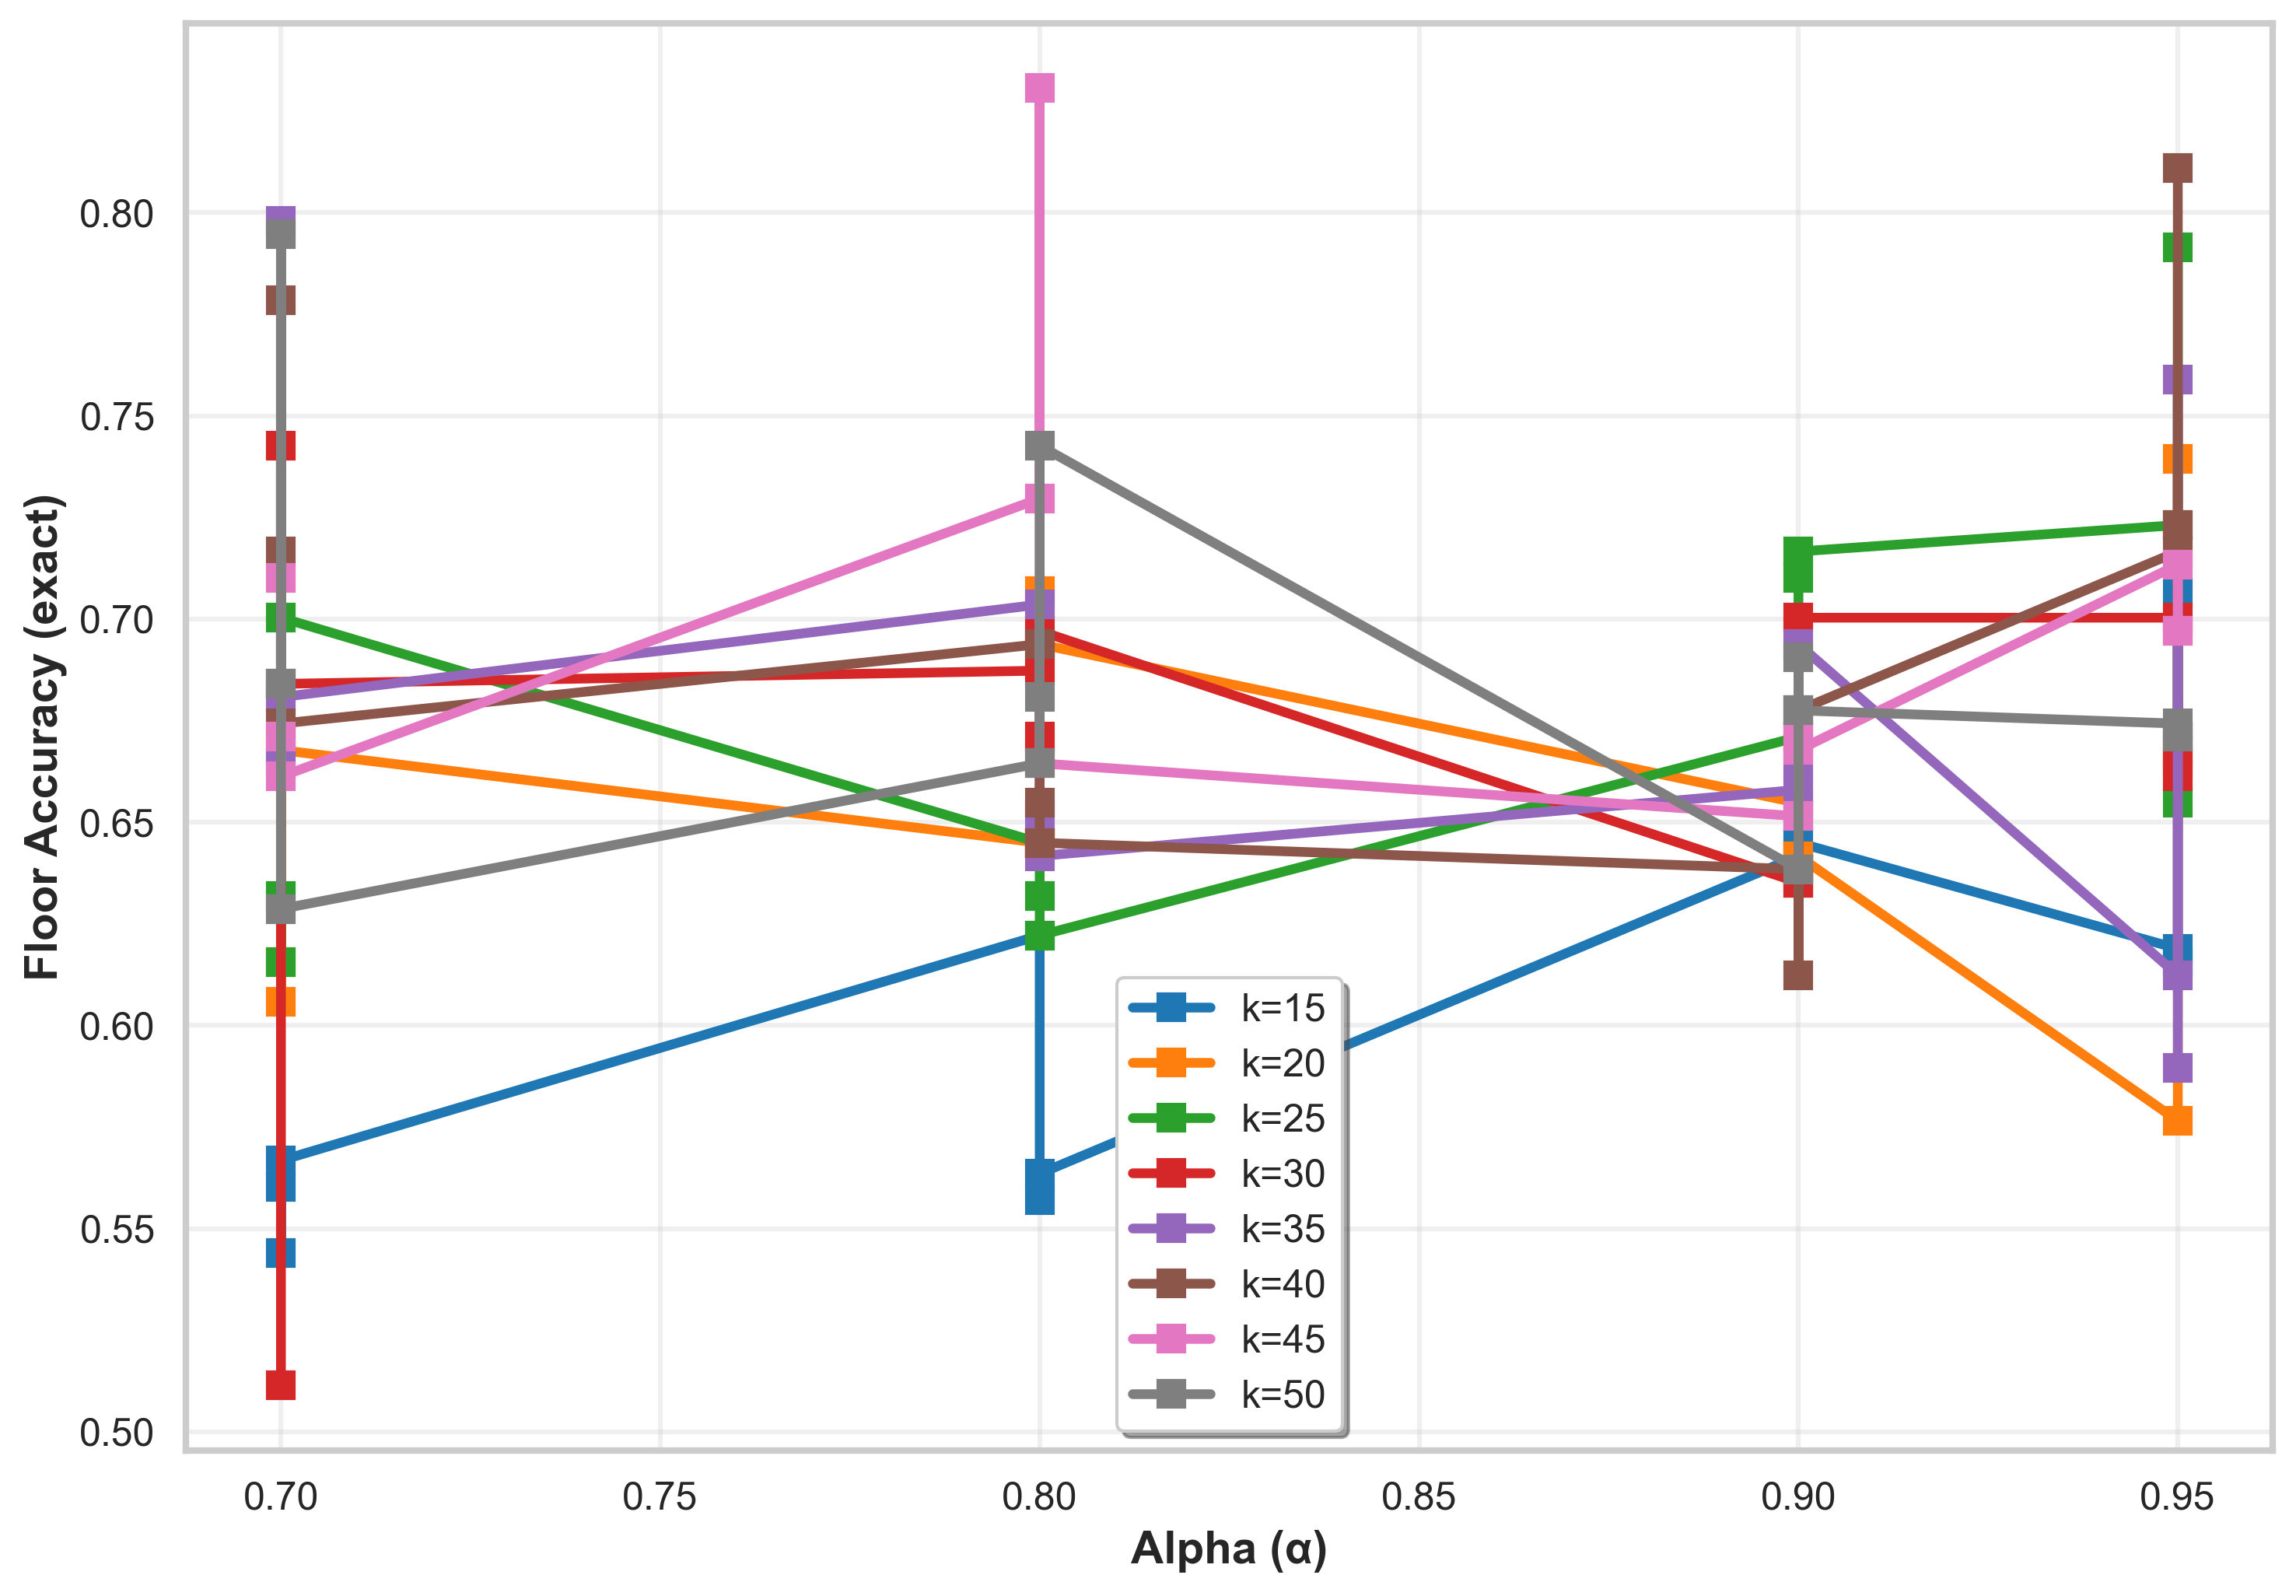

✓ Figure 2 saved: phase1_fig2_floor_acc_vs_alpha.png


In [23]:
fig, ax = plt.subplots(figsize=(10, 7))

for k_val in k_values:
    subset = phase1_df[phase1_df['k'] == k_val]
    ax.plot(subset['alpha'], subset['floor_accuracy_0'], 
            marker='s', label=f'k={k_val}', linewidth=3)

ax.set_xlabel('Alpha (α)', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (exact)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'phase1_fig2_floor_acc_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 2 saved: phase1_fig2_floor_acc_vs_alpha.png")

## Figure 3: Mean 3D Error Heatmap (k vs Alpha)

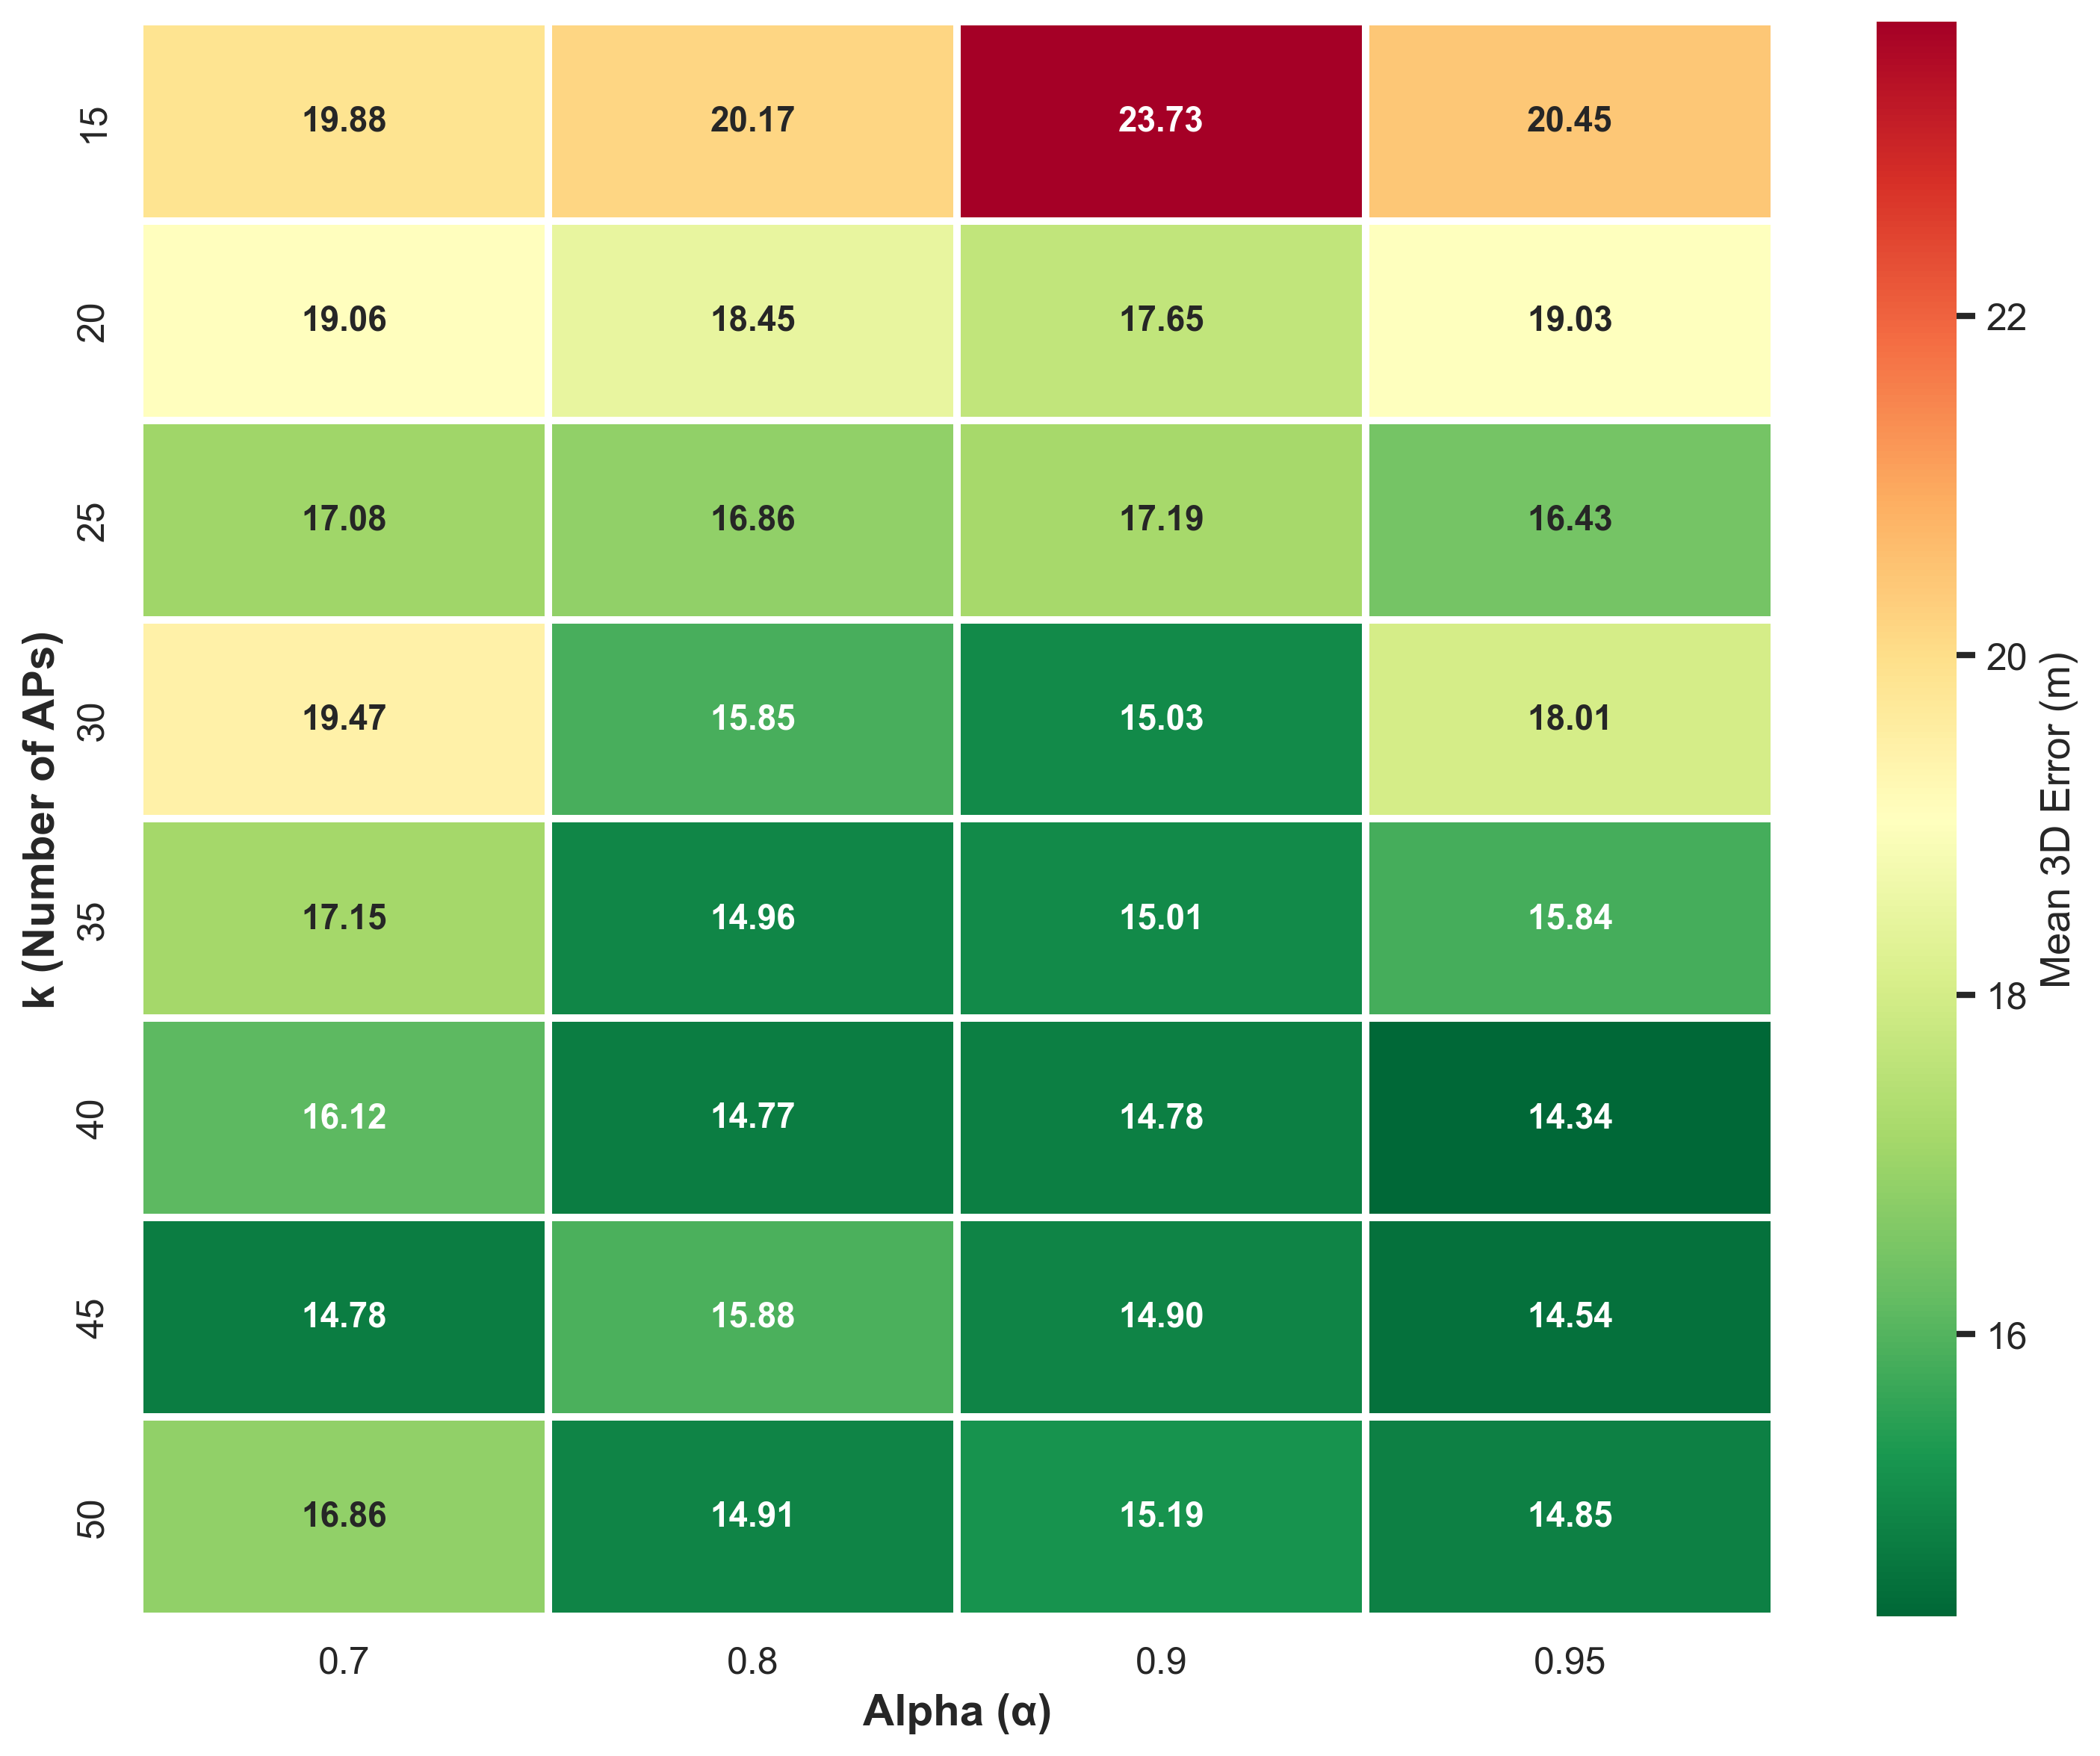

✓ Figure 3 saved: phase1_fig3_heatmap_k_alpha.png


In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

pivot_table = phase1_df.pivot_table(
    values='mean_3d_error_m', 
    index='k', 
    columns='alpha', 
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='RdYlGn_r', 
            ax=ax, cbar_kws={'label': 'Mean 3D Error (m)'}, 
            linewidths=2, linecolor='white',
            annot_kws={'fontsize': 11, 'fontweight': 'bold'})

ax.set_xlabel('Alpha (α)', fontsize=14, fontweight='bold')
ax.set_ylabel('k (Number of APs)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'phase1_fig3_heatmap_k_alpha.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 3 saved: phase1_fig3_heatmap_k_alpha.png")

## Figure 4: Positioning Accuracy vs Floor Accuracy (Penalty Effect)

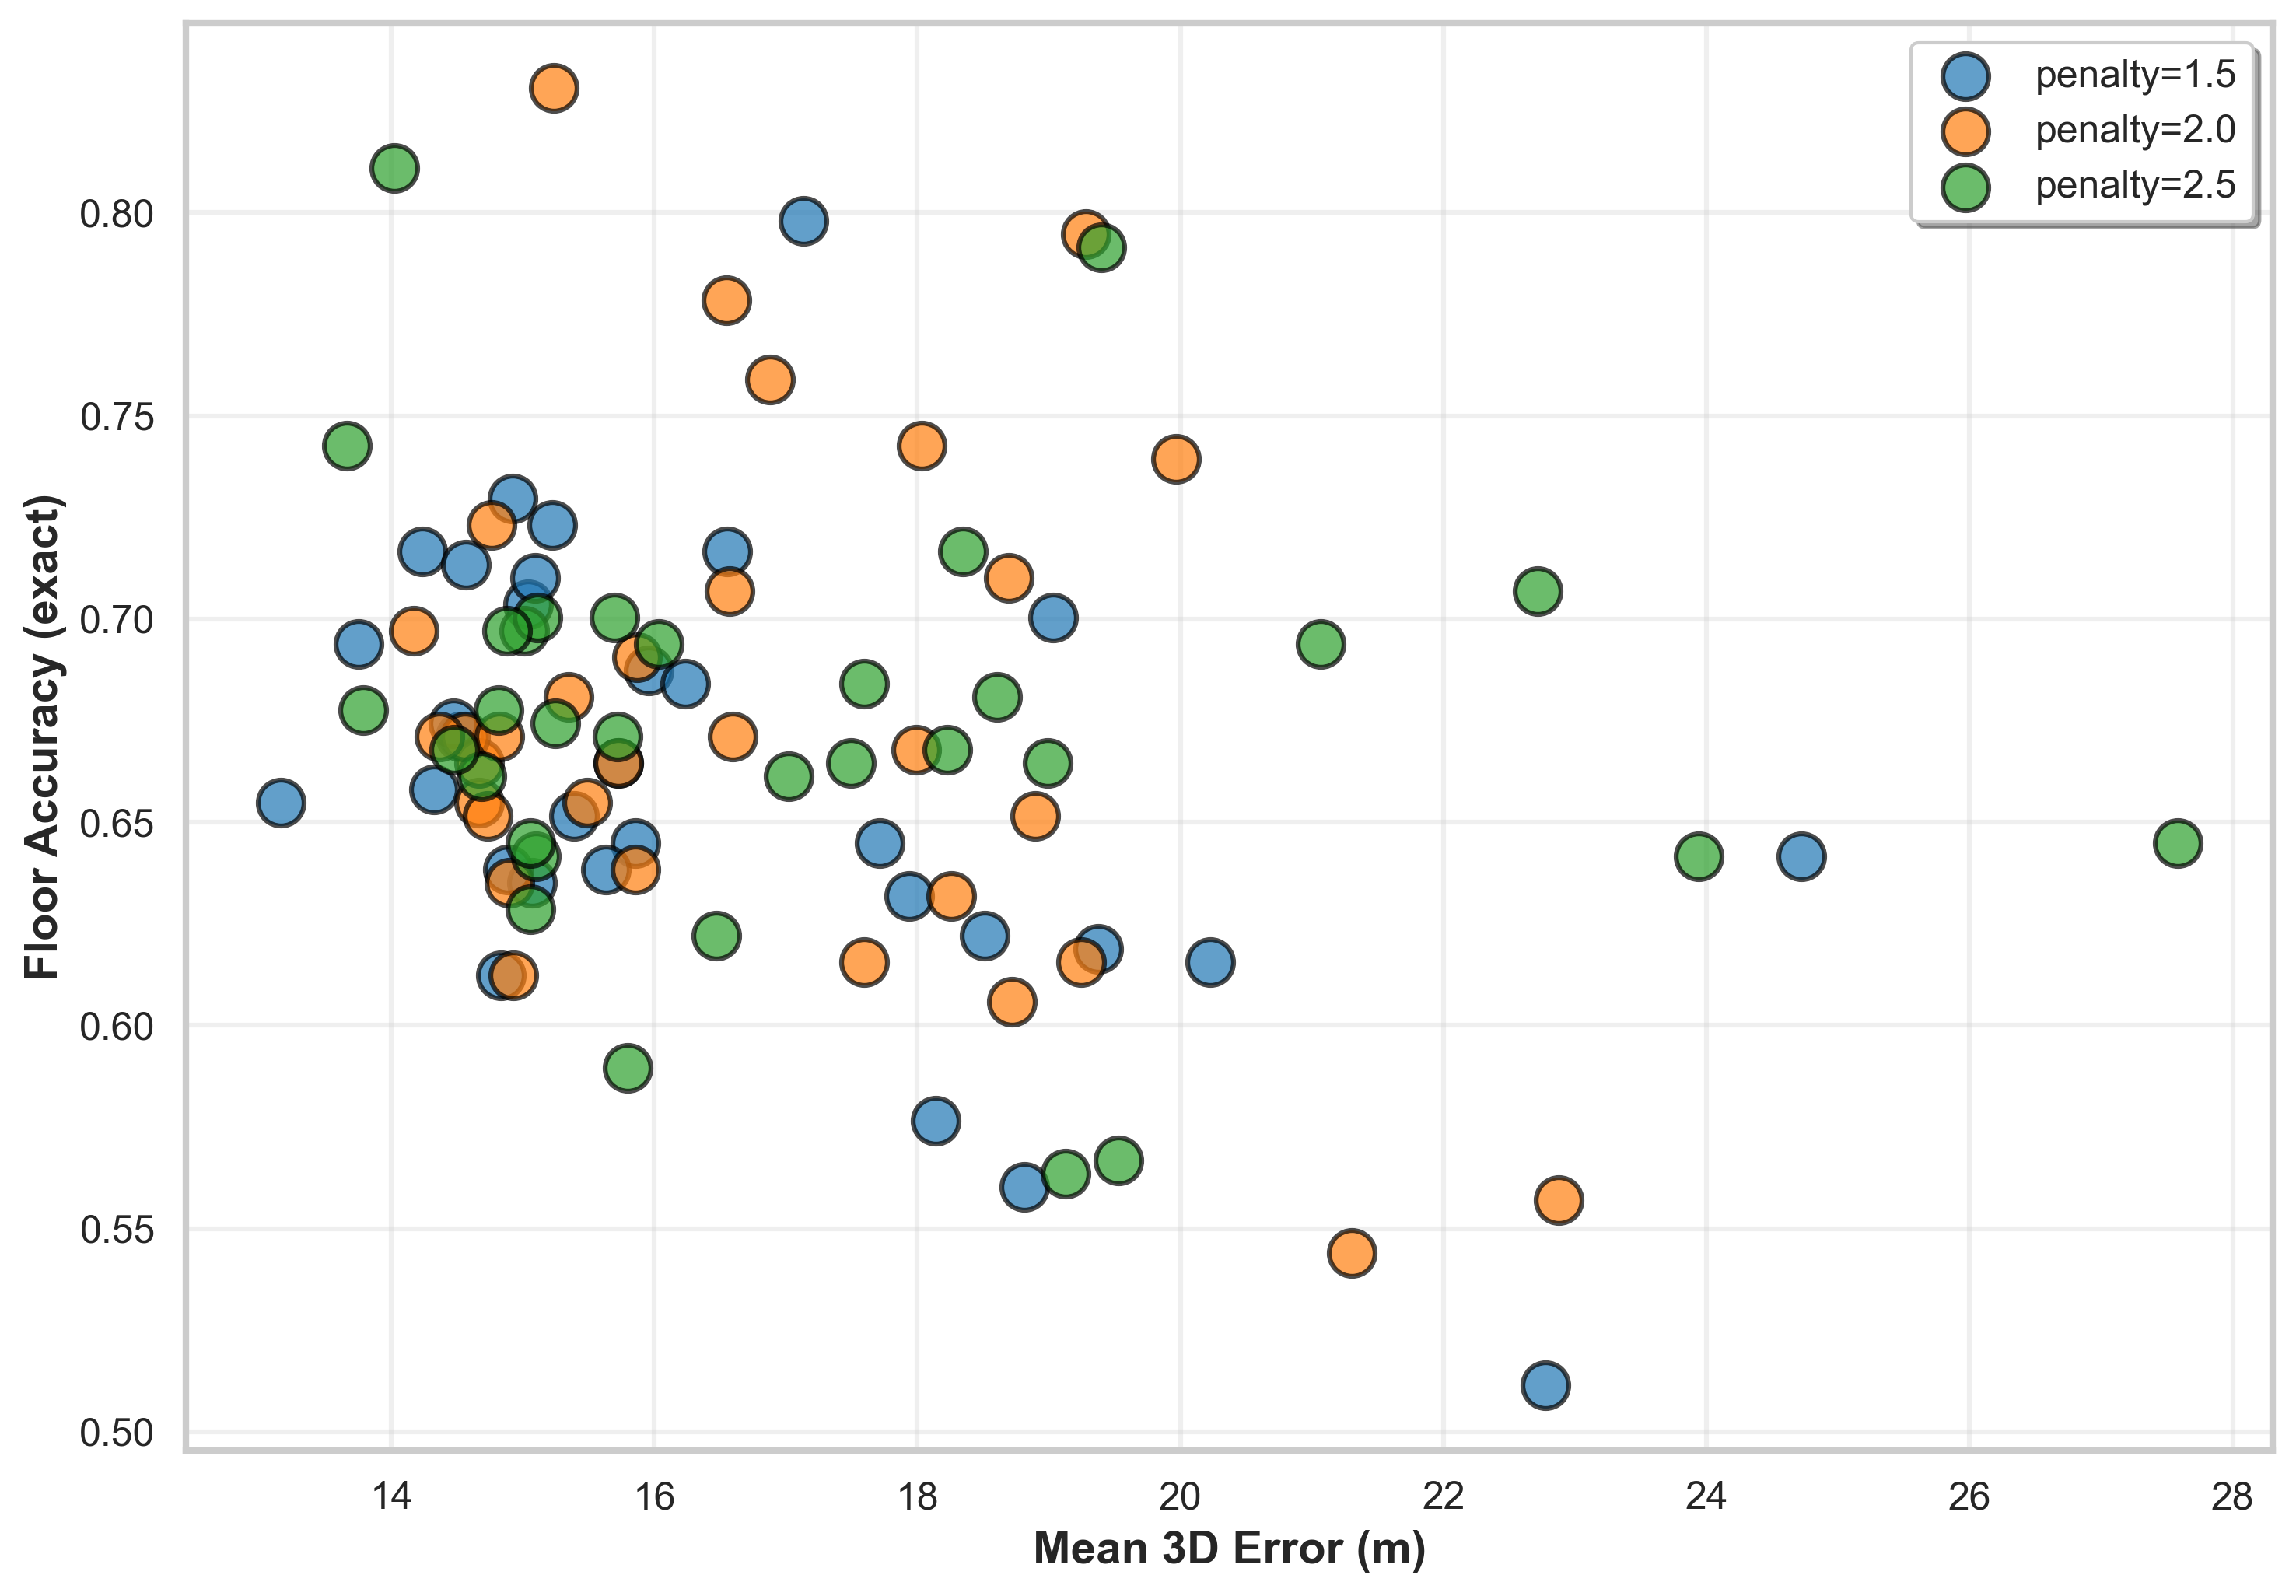

✓ Figure 4 saved: phase1_fig4_penalty_effect.png


In [25]:
fig, ax = plt.subplots(figsize=(10, 7))

for penalty_val in penalty_values:
    subset = phase1_df[phase1_df['penalty'] == penalty_val]
    ax.scatter(subset['mean_3d_error_m'], subset['floor_accuracy_0'], 
               label=f'penalty={penalty_val}', s=200, alpha=0.7, 
               edgecolors='black', linewidths=1.5)

ax.set_xlabel('Mean 3D Error (m)', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (exact)', fontsize=14, fontweight='bold')
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'phase1_fig4_penalty_effect.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 4 saved: phase1_fig4_penalty_effect.png")

---
# Phase 2 Visualizations: OpenJij Annealing Parameter Optimization

In [26]:
# Filter out infinite TTS values for visualization
phase2_finite = phase2_df[phase2_df['tts_s'] != float('inf')].copy()

# Find best configuration for marking
phase2_sorted = phase2_finite.sort_values('tts_s')
best_config = phase2_sorted.iloc[0]

print(f"Best OpenJij configuration (lowest TTS):")
print(f"  num_sweeps: {int(best_config['num_sweeps'])}")
print(f"  num_reads: {int(best_config['num_reads'])}")
print(f"  beta: {best_config['beta']}")
print(f"  gamma: {best_config['gamma']}")
print(f"  TTS: {best_config['tts_s']:.3f}s")
print(f"  Floor Accuracy: {best_config['floor_accuracy_0']:.2%}")

Best OpenJij configuration (lowest TTS):
  num_sweeps: 100
  num_reads: 10
  beta: 10.0
  gamma: 1.0
  TTS: 0.147s
  Floor Accuracy: 72.64%


## Figure 5: Time-to-Solution vs Number of Sweeps for Different num_reads

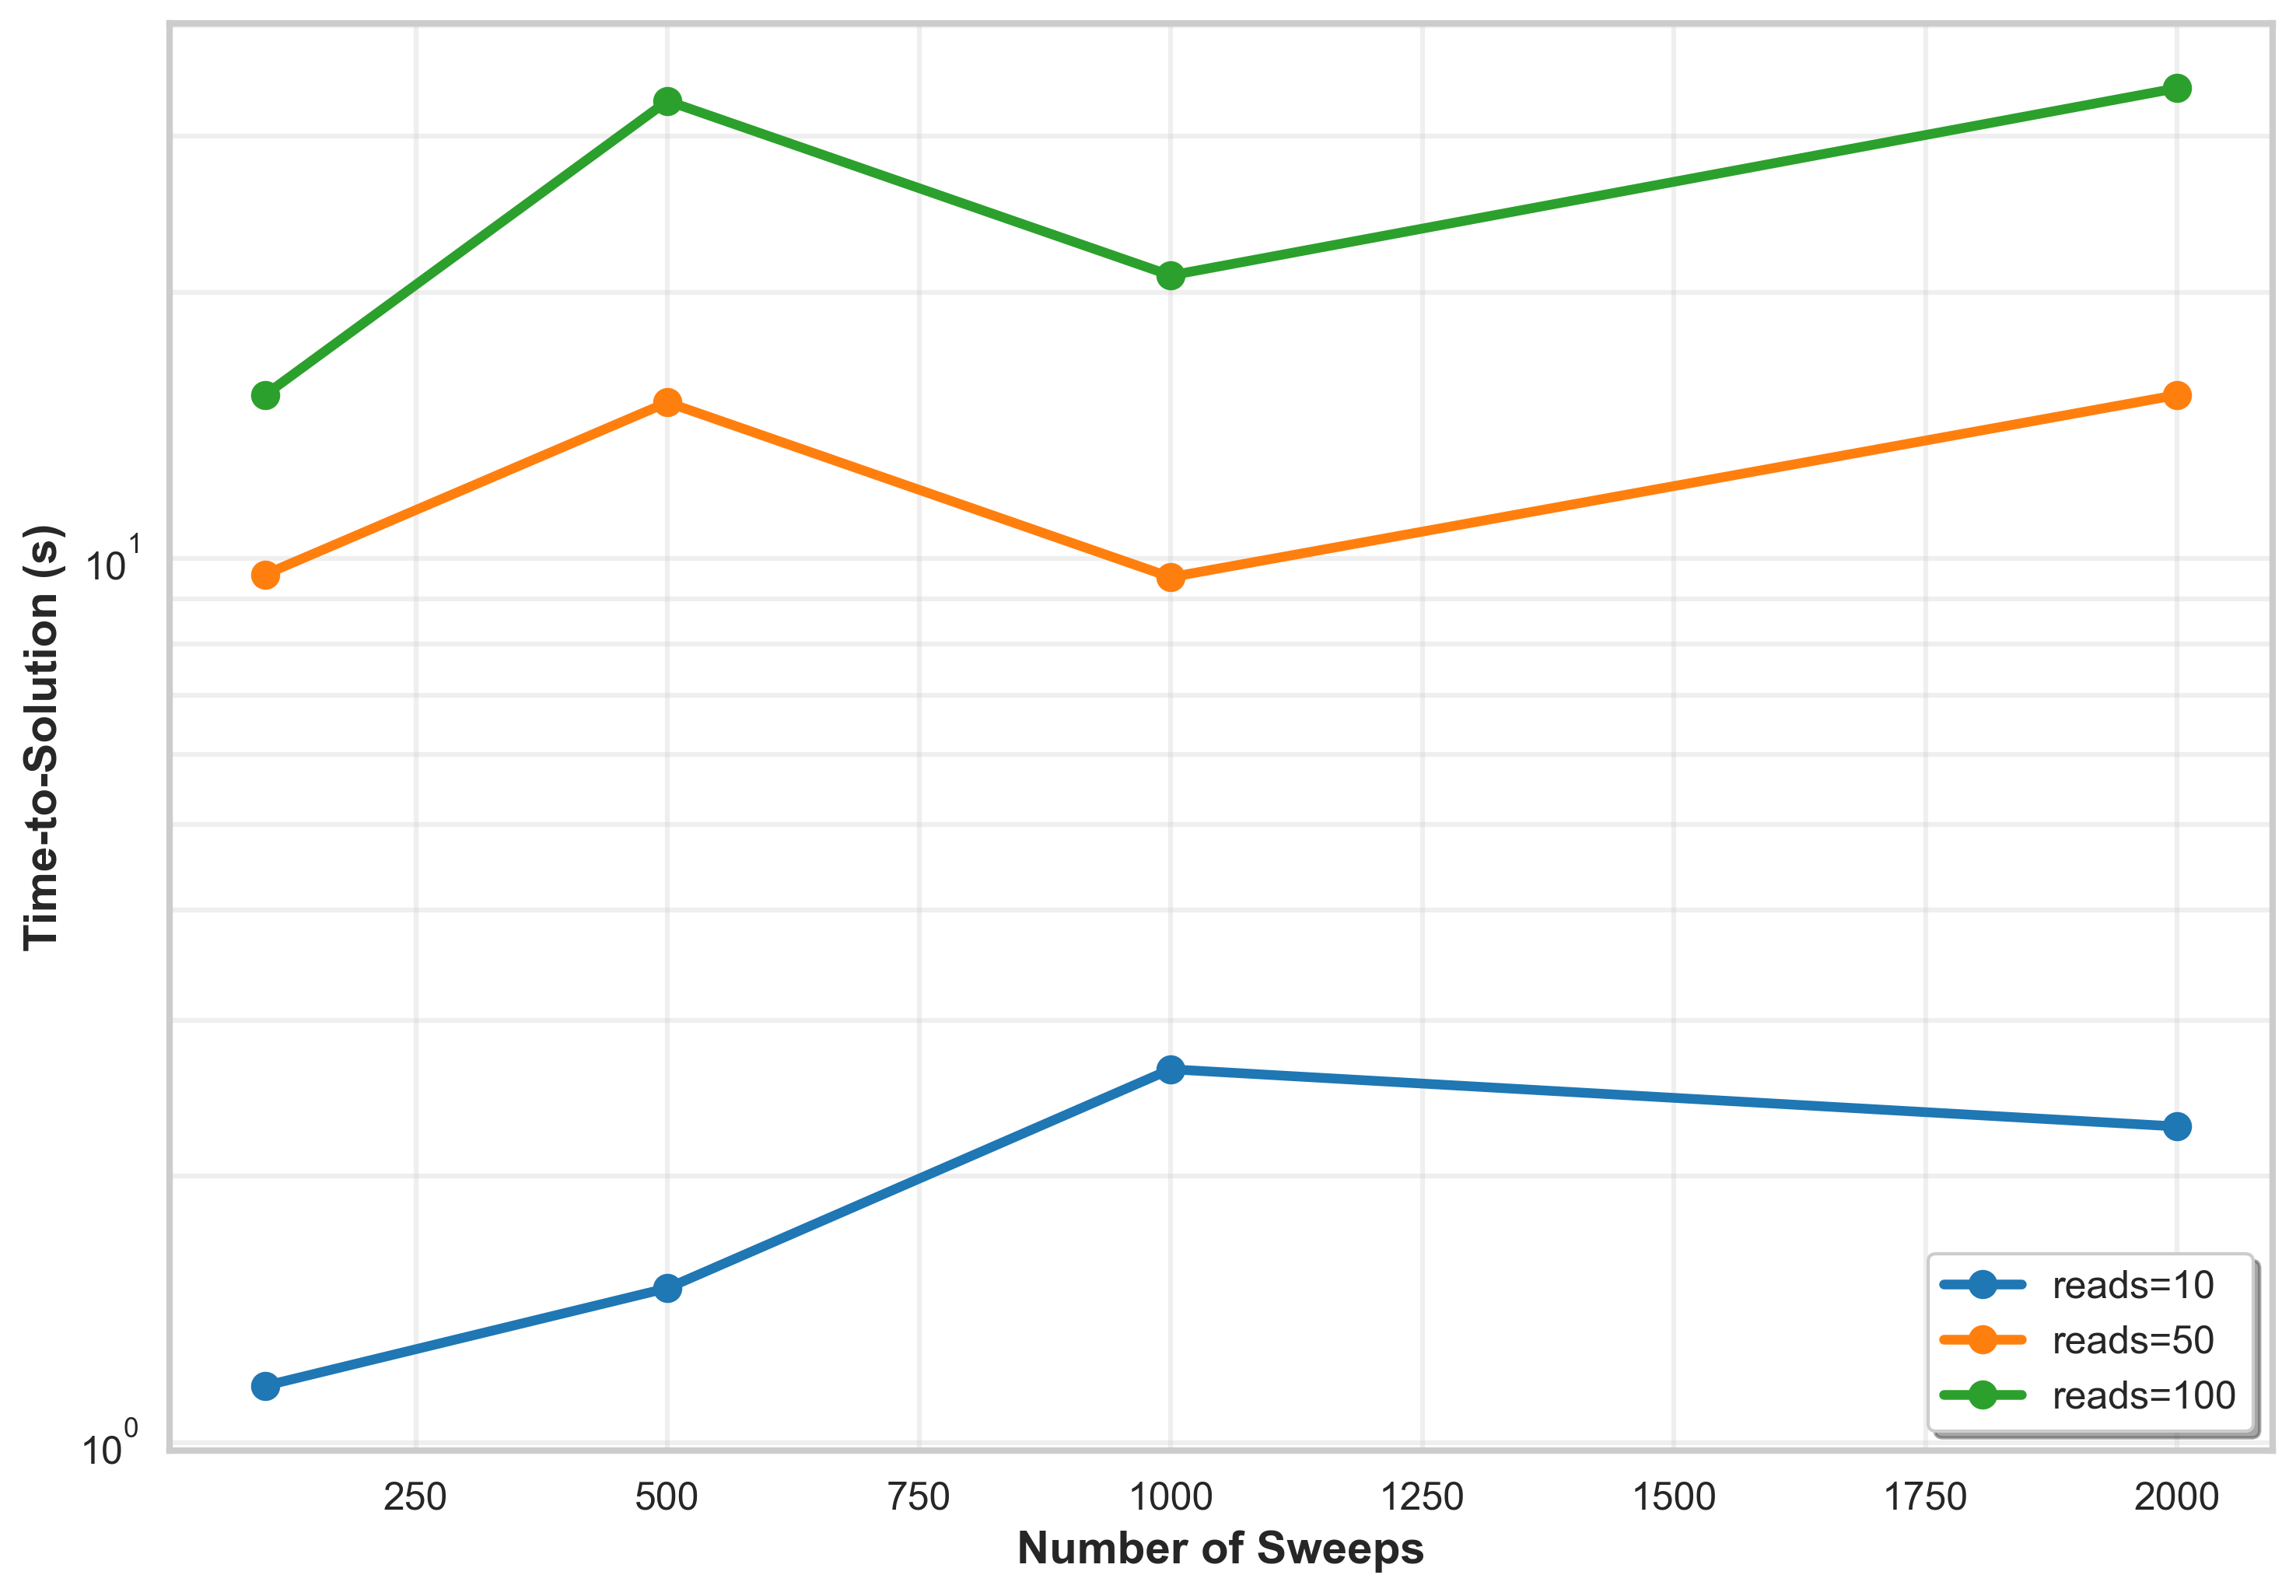

✓ Figure 5 saved: phase2_fig5_tts_vs_sweeps.png


In [27]:
fig, ax = plt.subplots(figsize=(10, 7))

for num_reads_val in num_reads_values:
    subset = phase2_finite[phase2_finite['num_reads'] == num_reads_val]
    # Group by num_sweeps and take mean of TTS
    grouped = subset.groupby('num_sweeps')['tts_s'].mean().reset_index()
    ax.plot(grouped['num_sweeps'], grouped['tts_s'], 
            marker='o', label=f'reads={num_reads_val}', linewidth=3)

ax.set_xlabel('Number of Sweeps', fontsize=14, fontweight='bold')
ax.set_ylabel('Time-to-Solution (s)', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig(output_dir / 'phase2_fig5_tts_vs_sweeps.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 5 saved: phase2_fig5_tts_vs_sweeps.png")

## Figure 6: Success Rate vs Number of Reads

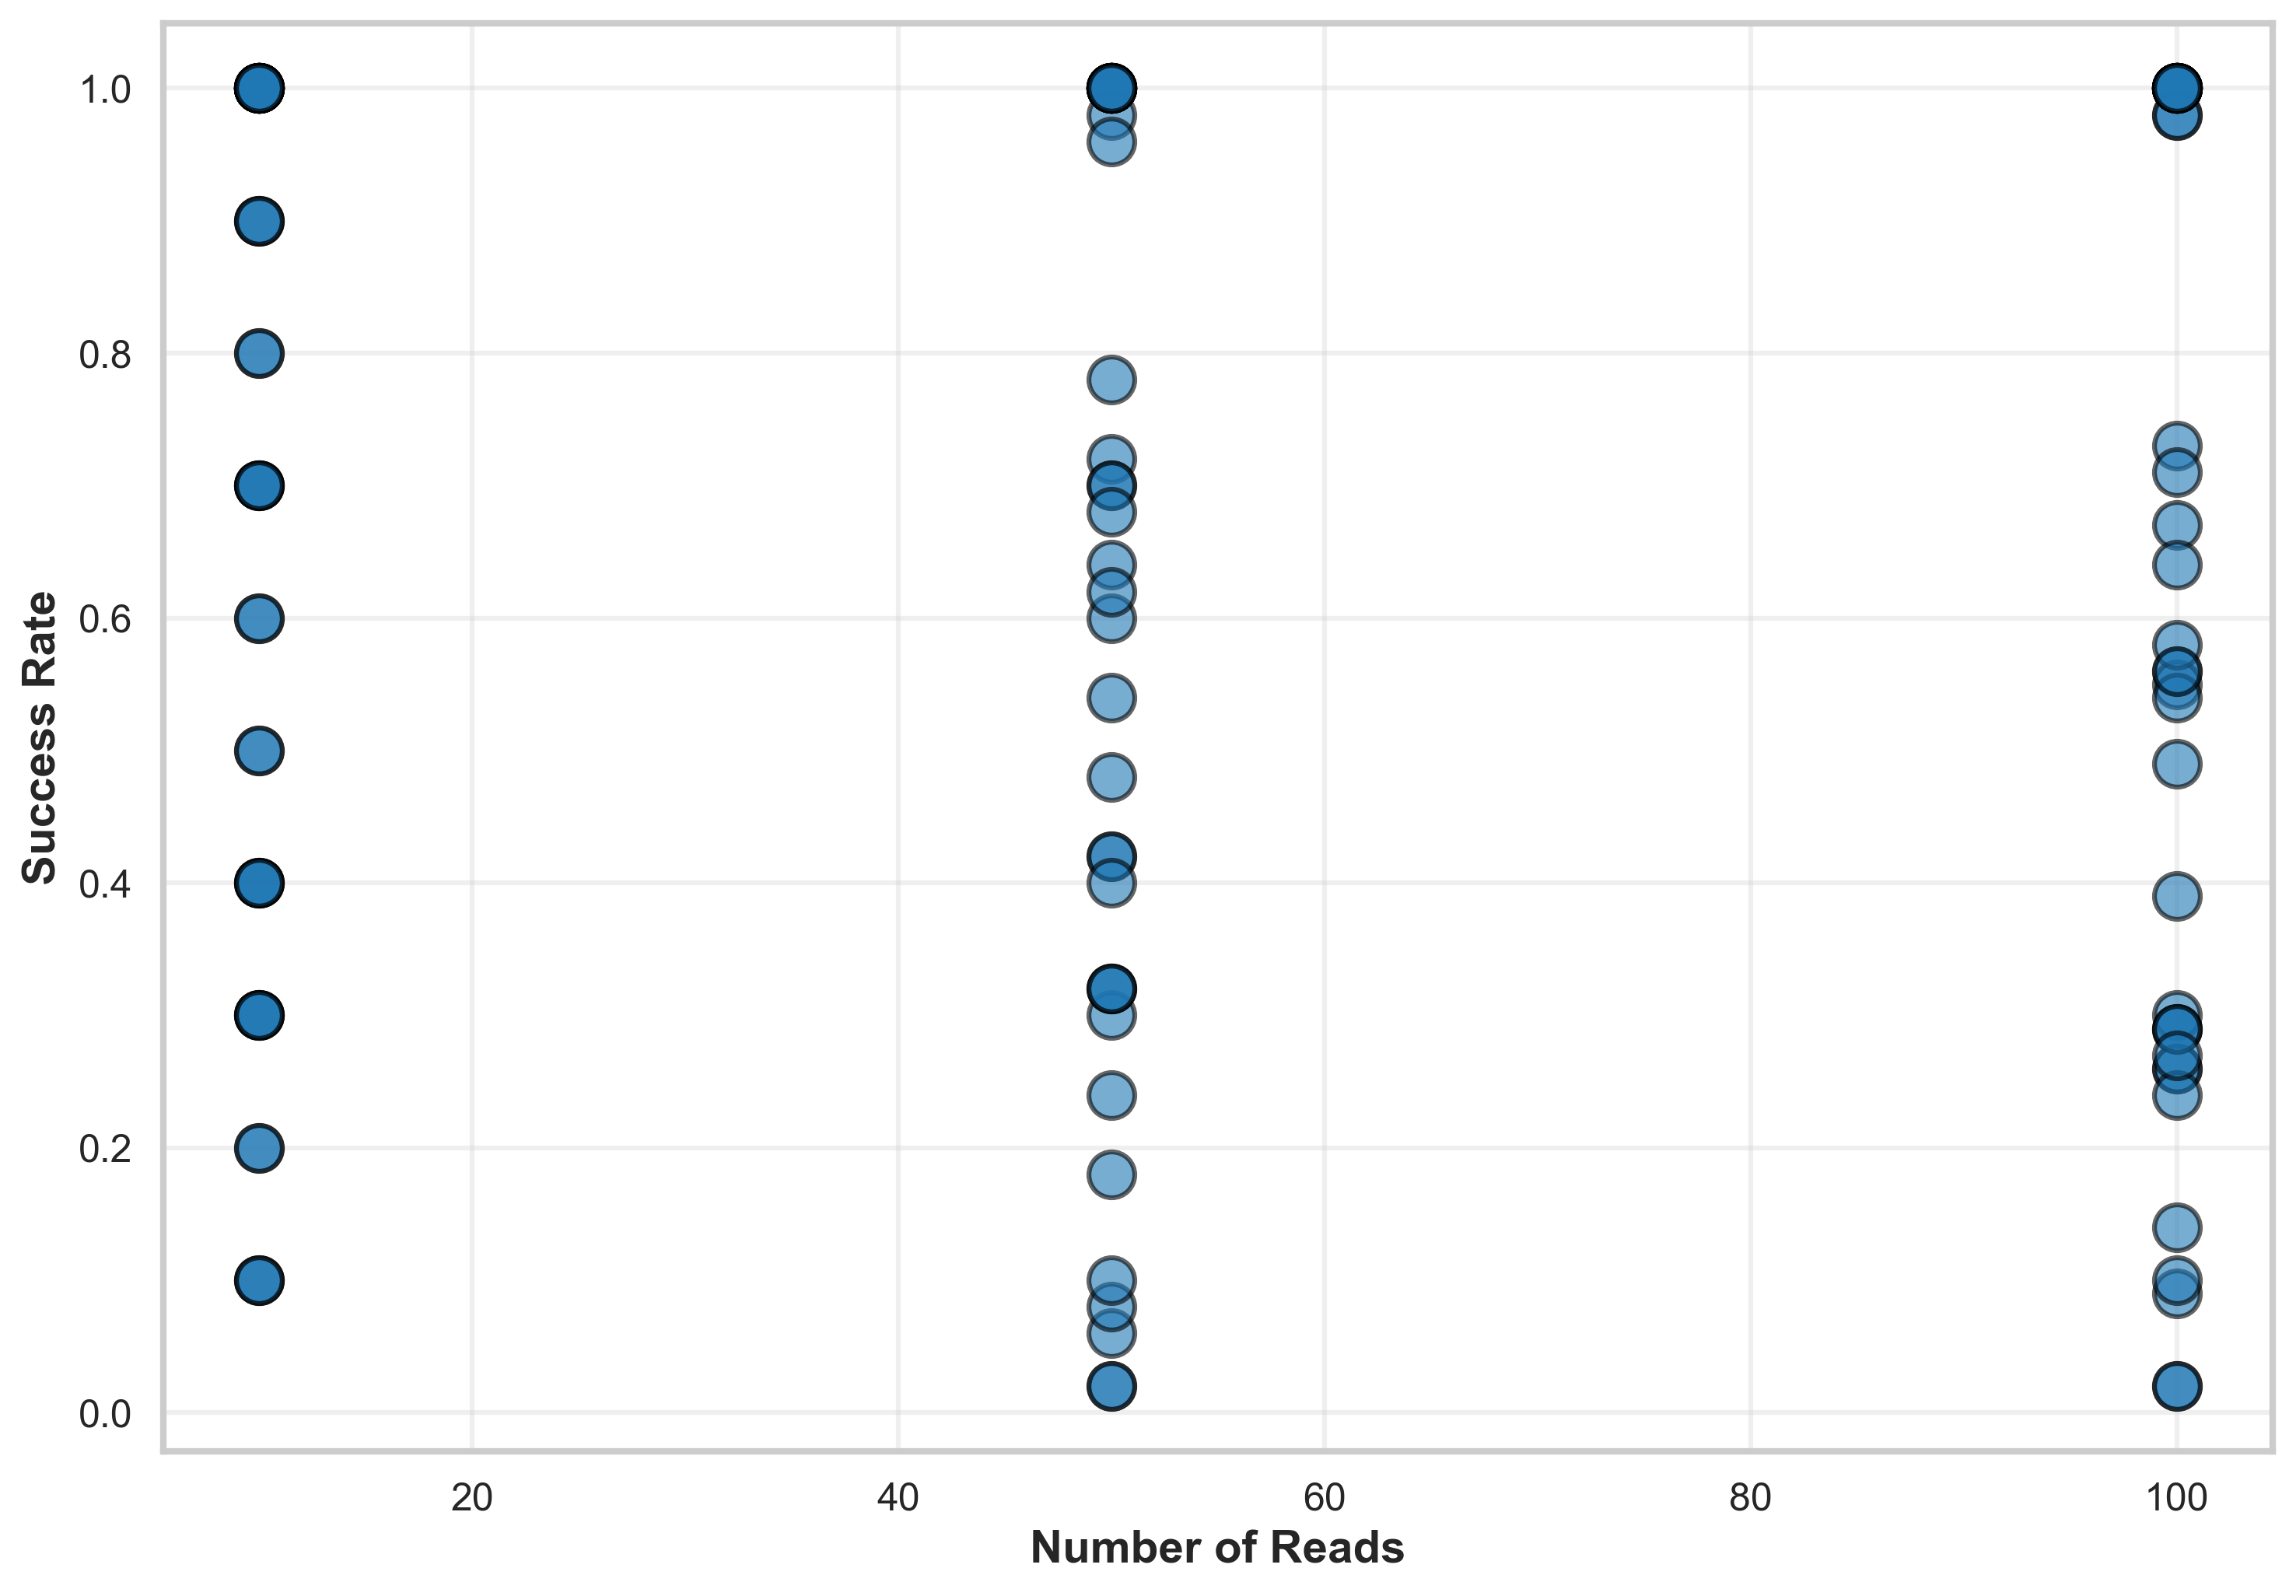

✓ Figure 6 saved: phase2_fig6_success_vs_reads.png


In [28]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(phase2_finite['num_reads'], phase2_finite['success_rate'], 
           alpha=0.6, s=200, edgecolors='black', linewidths=1.5)

ax.set_xlabel('Number of Reads', fontsize=14, fontweight='bold')
ax.set_ylabel('Success Rate', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'phase2_fig6_success_vs_reads.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 6 saved: phase2_fig6_success_vs_reads.png")

## Figure 7: Time-to-Solution vs Beta (Inverse Temperature) for Different Gamma Values

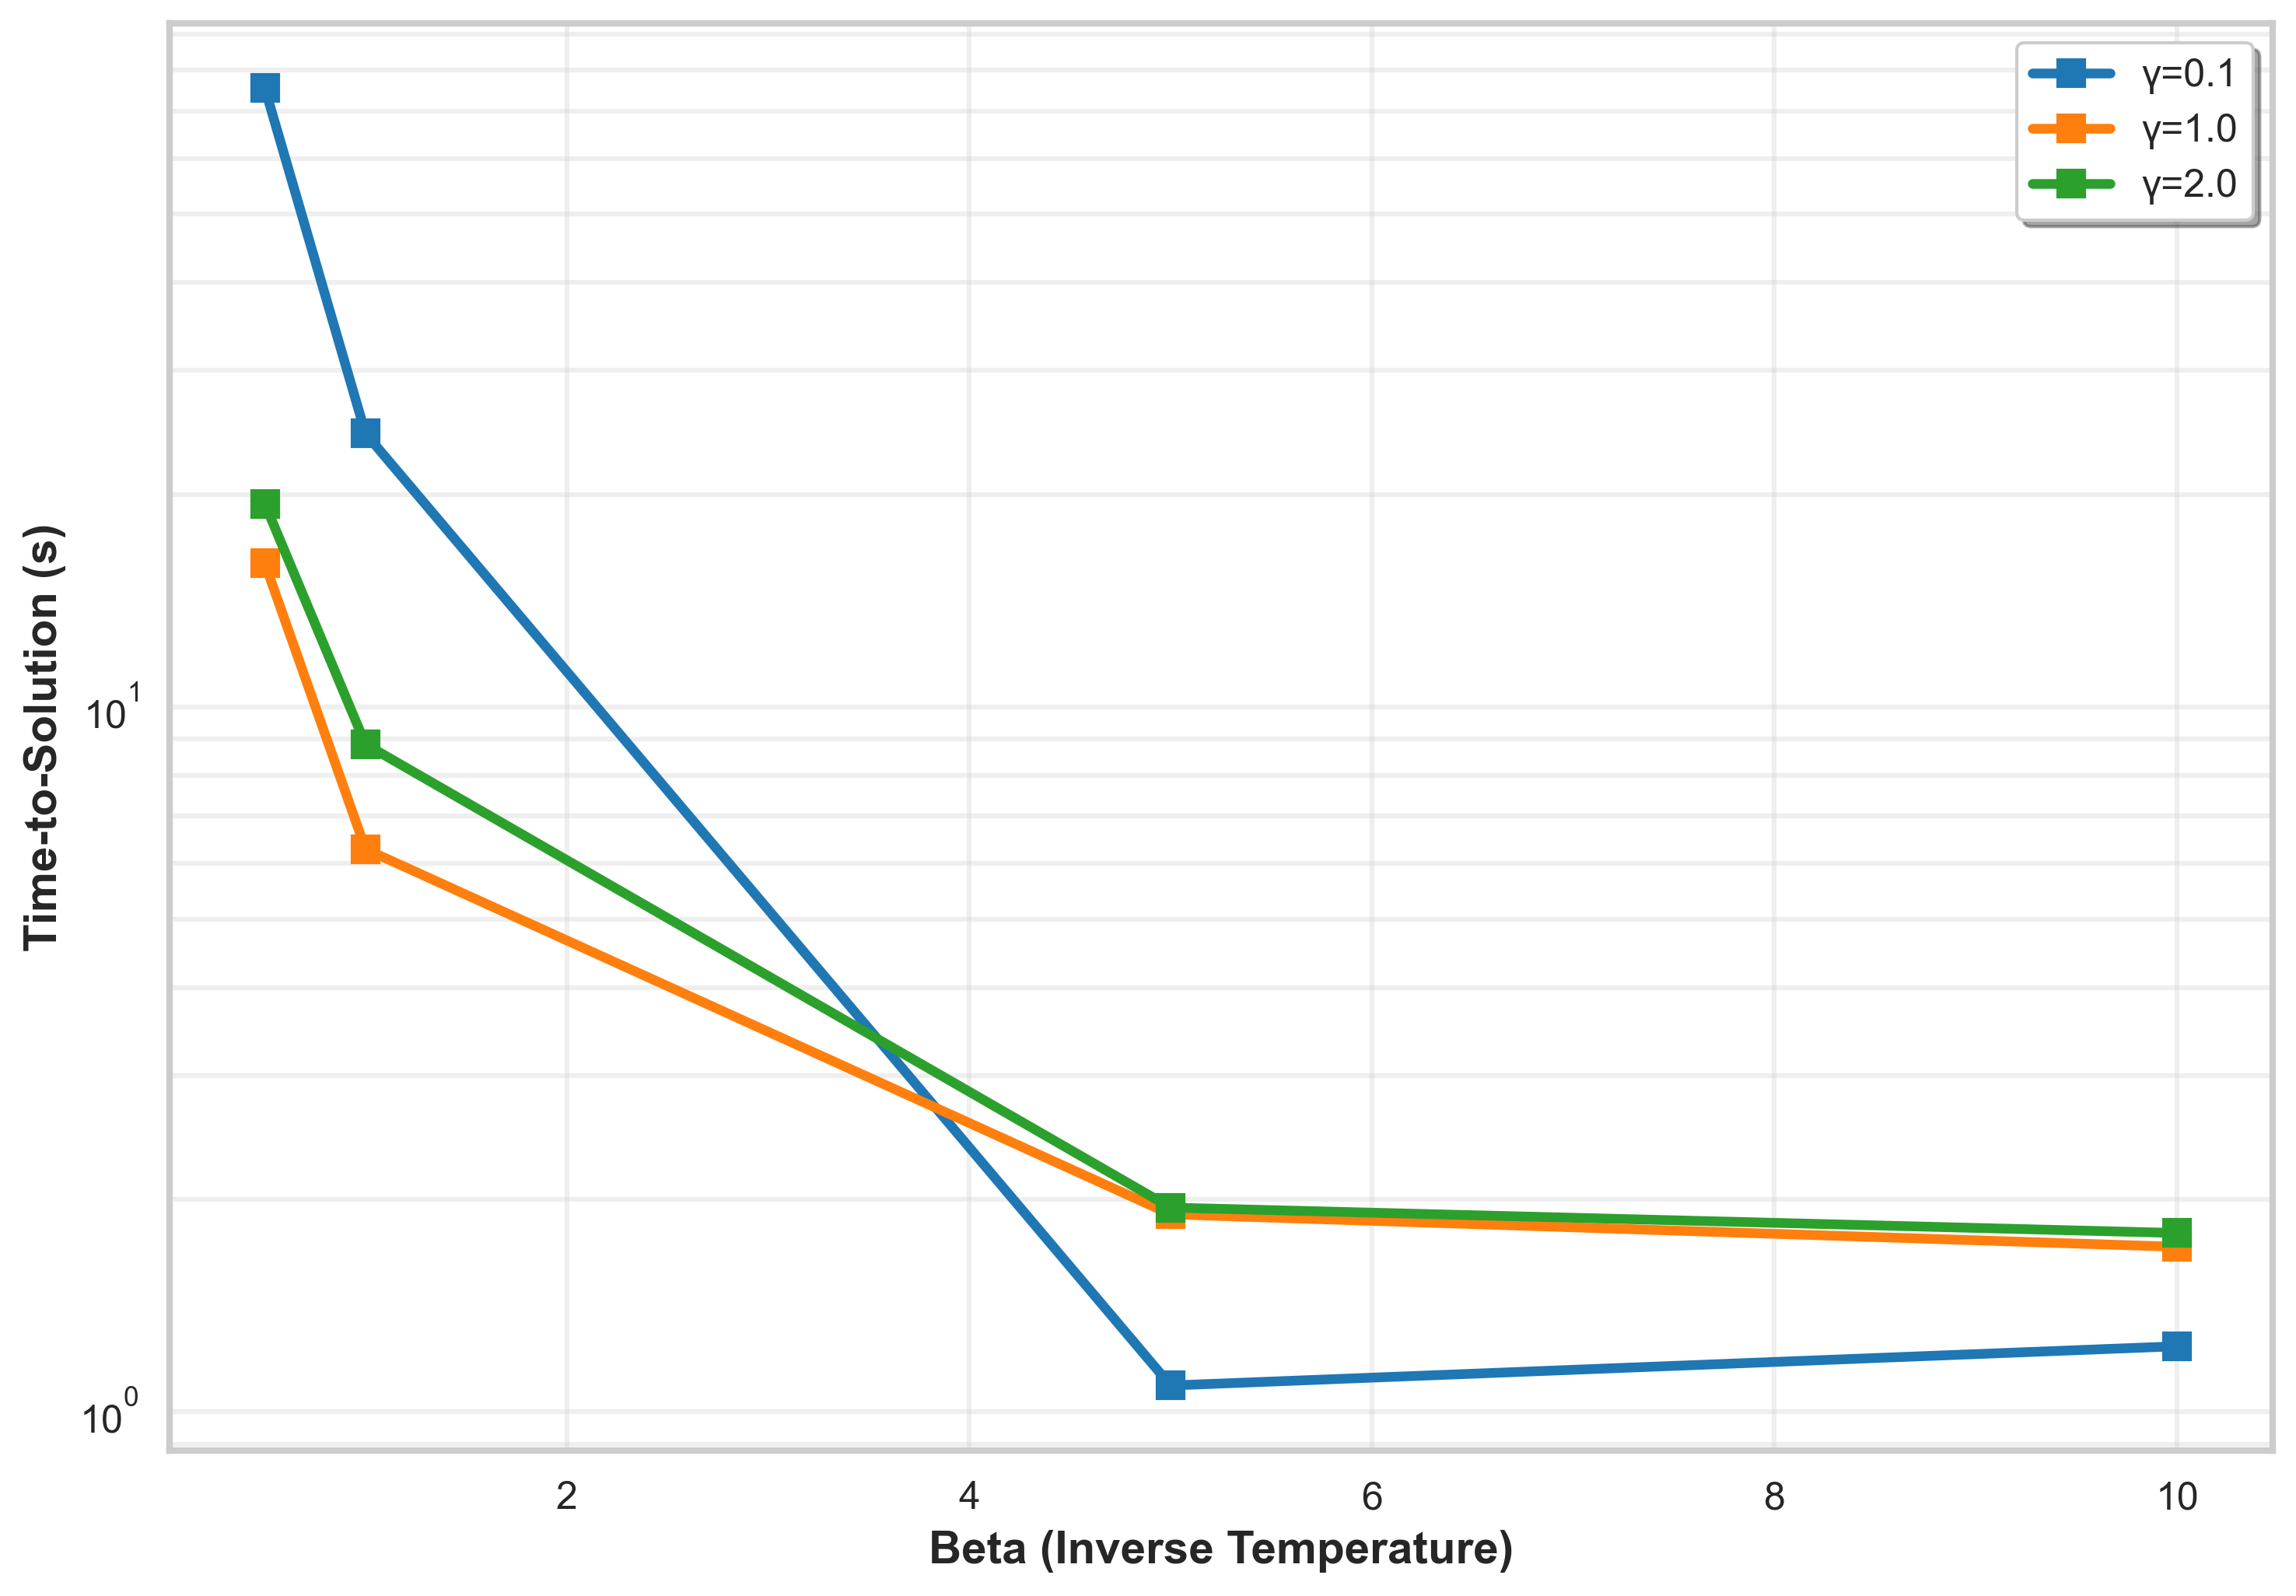

✓ Figure 7 saved: phase2_fig7_tts_vs_beta.png


In [29]:
fig, ax = plt.subplots(figsize=(10, 7))

for gamma_val in gamma_values:
    subset = phase2_finite[phase2_finite['gamma'] == gamma_val]
    # Group by beta and take mean of TTS
    grouped = subset.groupby('beta')['tts_s'].mean().reset_index()
    ax.plot(grouped['beta'], grouped['tts_s'], 
            marker='s', label=f'γ={gamma_val}', linewidth=3)

ax.set_xlabel('Beta (Inverse Temperature)', fontsize=14, fontweight='bold')
ax.set_ylabel('Time-to-Solution (s)', fontsize=14, fontweight='bold')
ax.set_yscale('log')
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig(output_dir / 'phase2_fig7_tts_vs_beta.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 7 saved: phase2_fig7_tts_vs_beta.png")

## Figure 8: Floor Accuracy vs Time-to-Solution (Colored by num_sweeps)

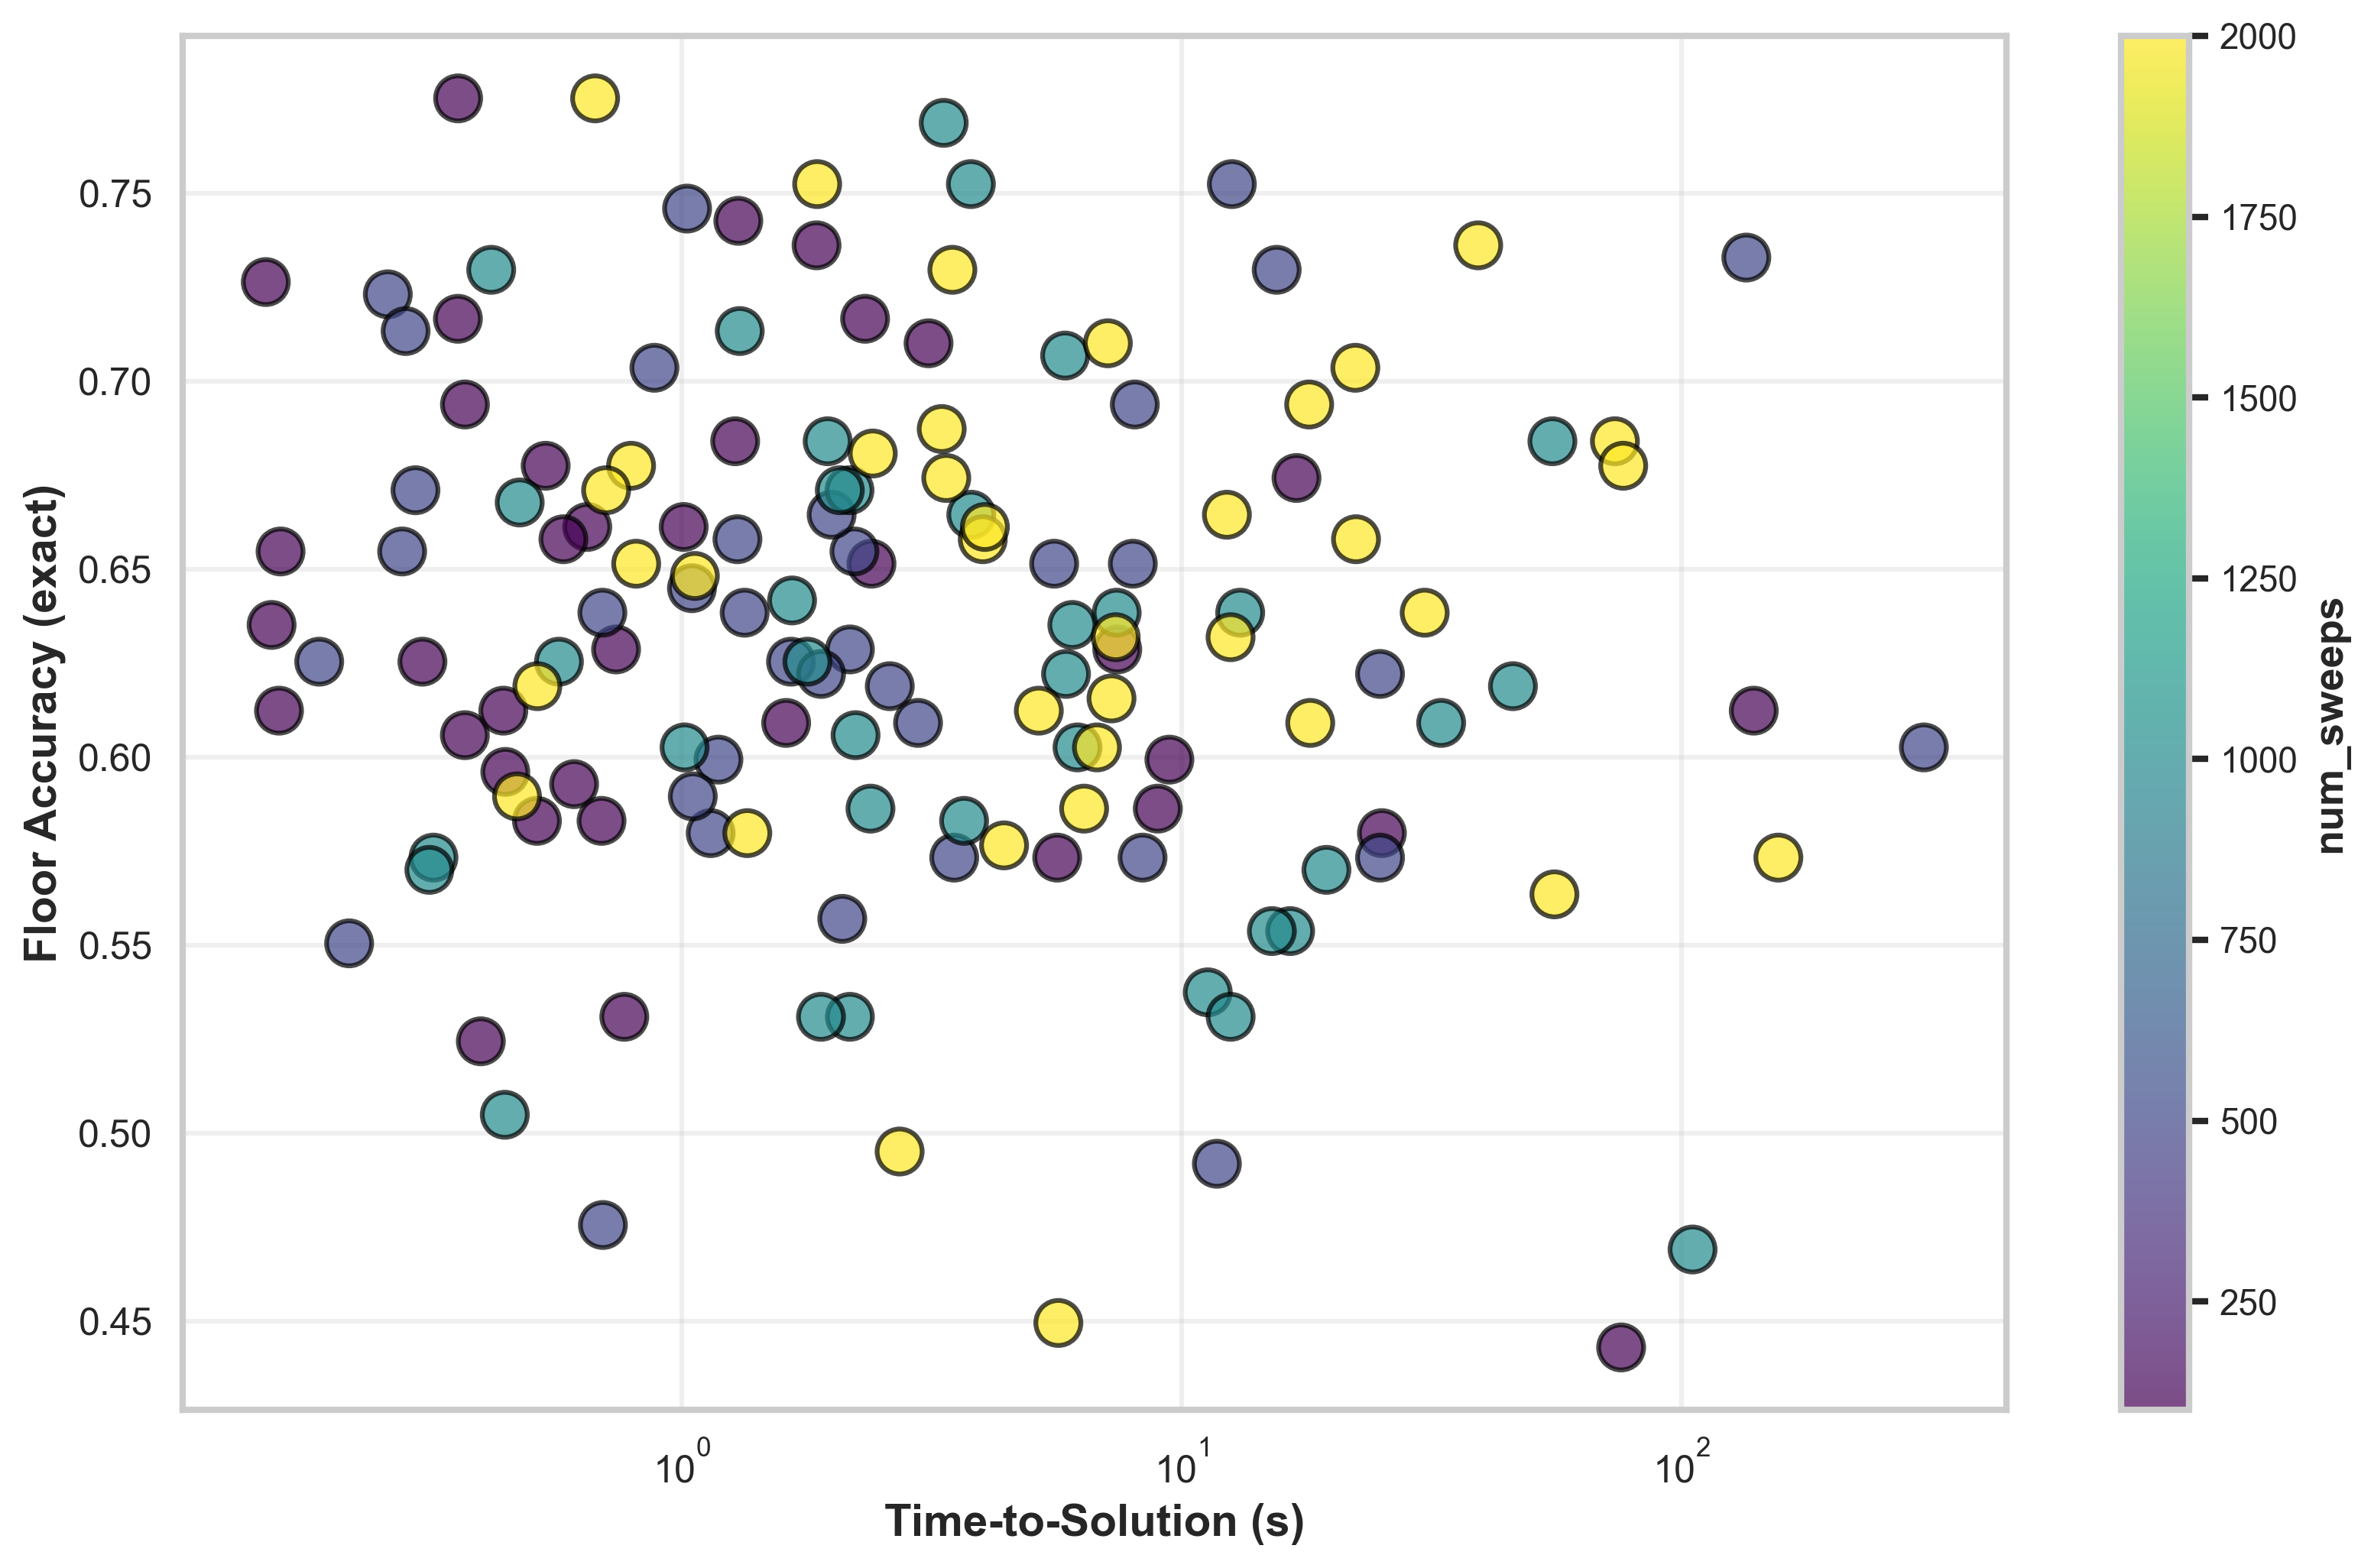

✓ Figure 8 saved: phase2_fig8_floor_acc_vs_tts.png


In [30]:
fig, ax = plt.subplots(figsize=(11, 7))

scatter = ax.scatter(phase2_finite['tts_s'], phase2_finite['floor_accuracy_0'], 
                     c=phase2_finite['num_sweeps'], cmap='viridis', 
                     s=200, alpha=0.7, edgecolors='black', linewidths=1.5)

ax.set_xlabel('Time-to-Solution (s)', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (exact)', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('num_sweeps', fontsize=13, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

plt.tight_layout()
plt.savefig(output_dir / 'phase2_fig8_floor_acc_vs_tts.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 8 saved: phase2_fig8_floor_acc_vs_tts.png")

## Figure 9: Mean 3D Error vs Time-to-Solution (Colored by Success Rate)

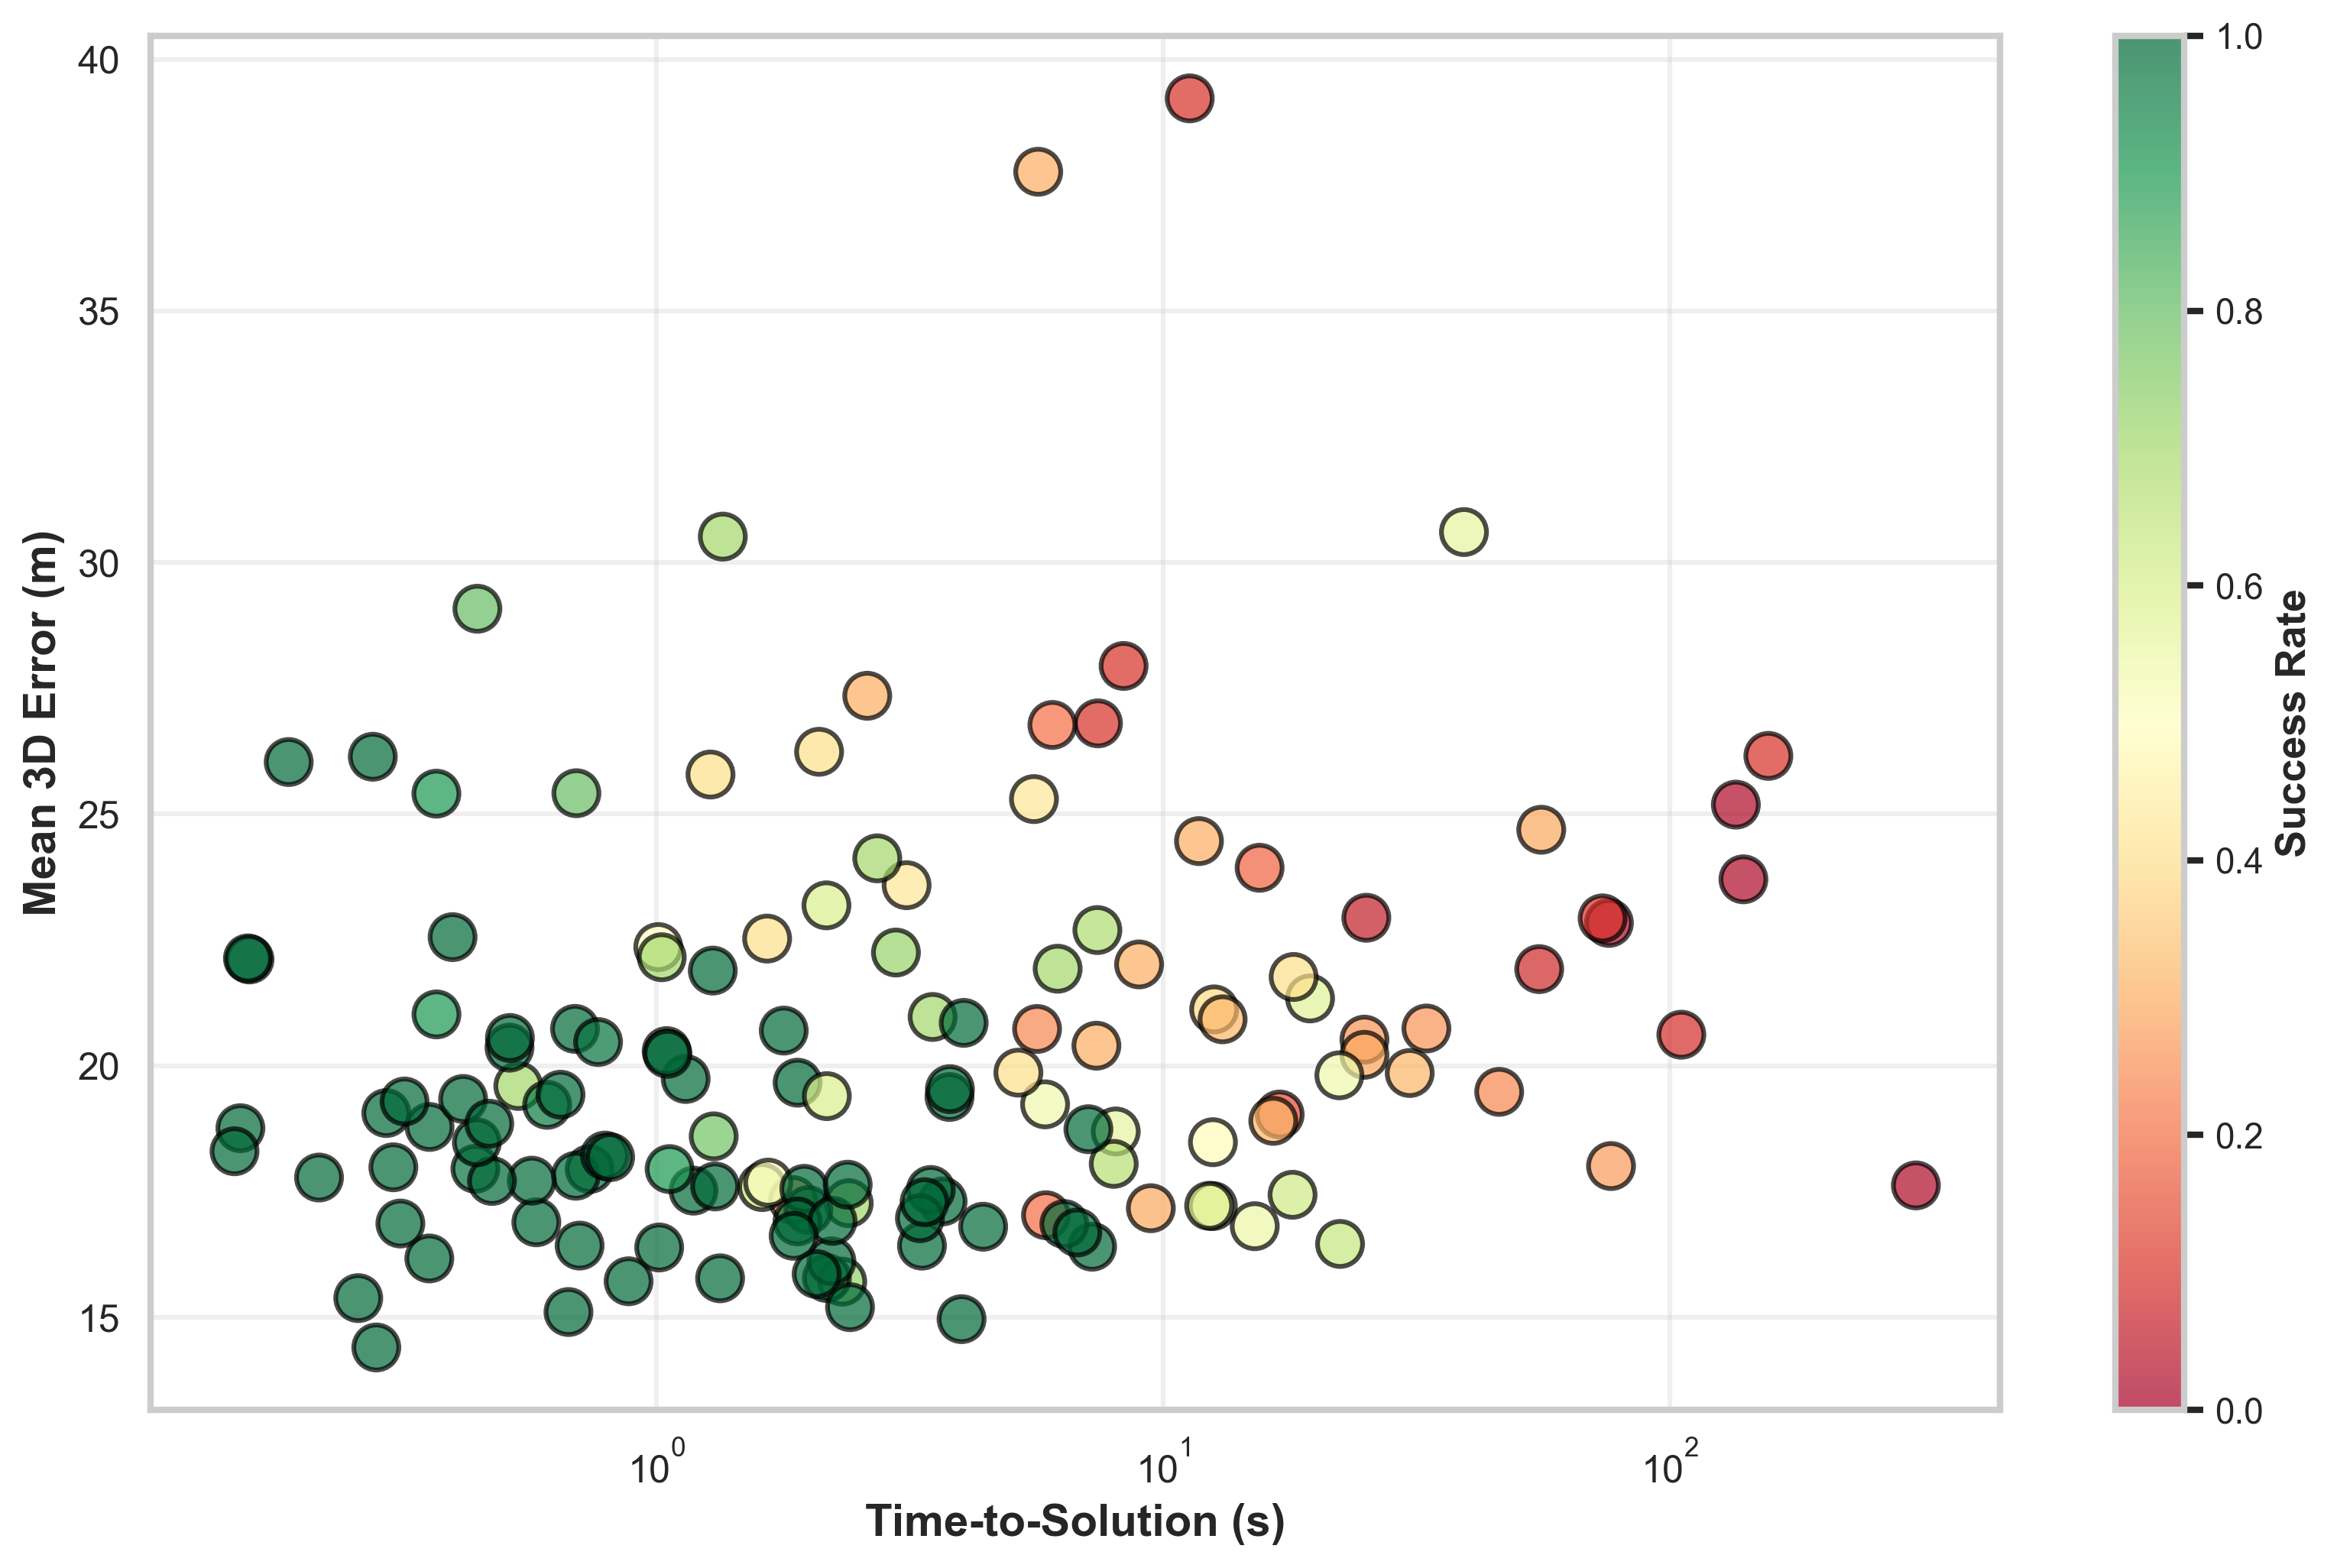

✓ Figure 9 saved: phase2_fig9_error_vs_tts.png


In [31]:
fig, ax = plt.subplots(figsize=(11, 7))

scatter = ax.scatter(phase2_finite['tts_s'], phase2_finite['mean_3d_error_m'], 
                     c=phase2_finite['success_rate'], cmap='RdYlGn', 
                     s=200, alpha=0.7, edgecolors='black', linewidths=1.5,
                     vmin=0, vmax=1)

ax.set_xlabel('Time-to-Solution (s)', fontsize=14, fontweight='bold')
ax.set_ylabel('Mean 3D Error (m)', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Success Rate', fontsize=13, fontweight='bold')
cbar.ax.tick_params(labelsize=11)

plt.tight_layout()
plt.savefig(output_dir / 'phase2_fig9_error_vs_tts.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 9 saved: phase2_fig9_error_vs_tts.png")

## Figure 10: Optimization Trade-off (TTS vs Floor Accuracy with Best Configuration Marked)

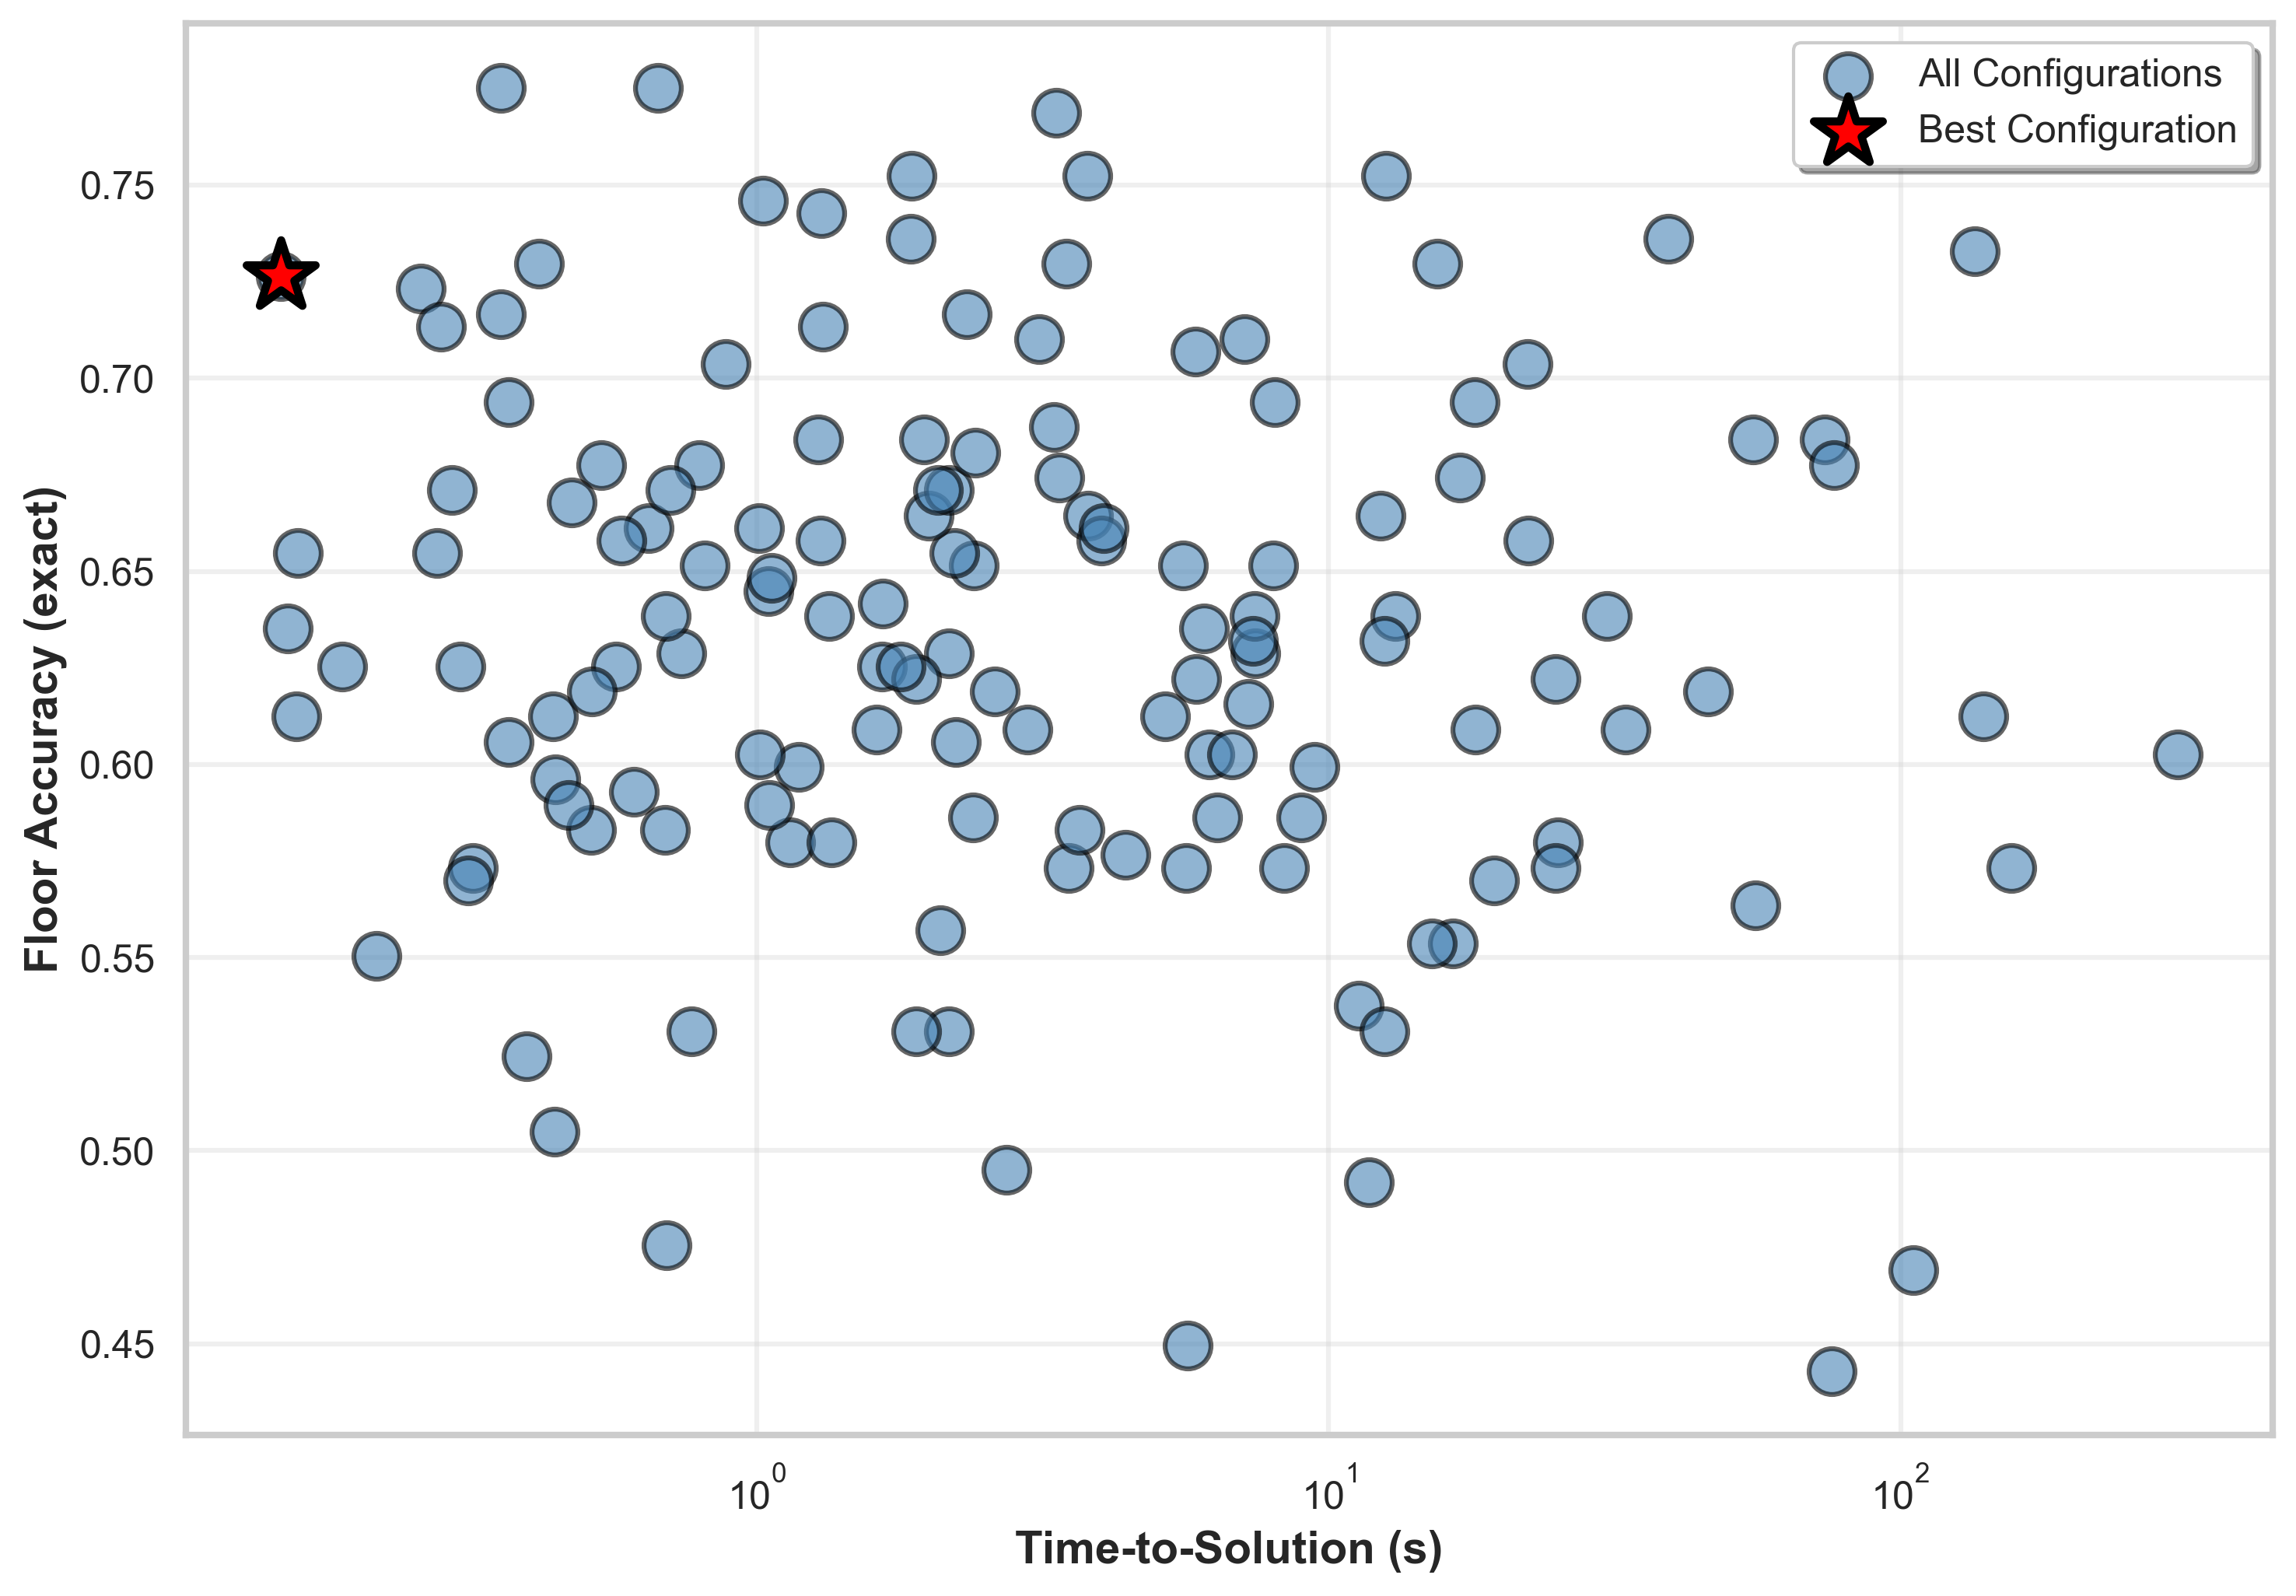

✓ Figure 10 saved: phase2_fig10_pareto_front.png


In [32]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot all configurations
ax.scatter(phase2_finite['tts_s'], phase2_finite['floor_accuracy_0'], 
           s=200, alpha=0.6, edgecolors='black', linewidths=1.5,
           label='All Configurations', color='steelblue')

# Mark best configuration
ax.scatter(best_config['tts_s'], best_config['floor_accuracy_0'], 
           s=500, color='red', marker='*', edgecolors='black', 
           linewidths=2.5, label='Best Configuration', zorder=10)

ax.set_xlabel('Time-to-Solution (s)', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (exact)', fontsize=14, fontweight='bold')
ax.set_xscale('log')
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'phase2_fig10_pareto_front.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 10 saved: phase2_fig10_pareto_front.png")

---
# Importance Metrics Comparison

Comparison of different importance methods (Entropy, Variance, Max, Average) for k=20 APs

In [33]:
# Load importance metrics comparison results
pipeline_file = results_dir / 'pipeline_experiment_results.csv'

if not pipeline_file.exists():
    raise FileNotFoundError(f"Pipeline results file not found: {pipeline_file}")

pipeline_df = pd.read_csv(pipeline_file)

# Filter for k=20 only and specific methods from the table
k20_df = pipeline_df[pipeline_df['Num_APs'] == 20].copy()

# Filter for the four methods in the table (excluding MUTUAL_INFO)
importance_methods = ['ENTROPY', 'VARIANCE', 'MAX', 'AVERAGE']
k20_df = k20_df[k20_df['Importance_Method'].isin(importance_methods)]

# Convert to percentages for floor accuracy
k20_df['Floor_Accuracy_Exact_Pct'] = k20_df['Floor_Accuracy_0'] * 100
k20_df['Floor_Accuracy_Plus1_Pct'] = k20_df['Floor_Accuracy_1'] * 100

# Sort by method name for consistent ordering
k20_df = k20_df.sort_values('Importance_Method')

print("✓ Loaded pipeline results for importance metrics comparison")
print(f"  Methods: {k20_df['Importance_Method'].tolist()}")
print(f"\nData preview:")
print(k20_df[['Importance_Method', 'Median_3D_Error_m', 'Floor_Accuracy_Exact_Pct', 'Floor_Accuracy_Plus1_Pct']].to_string(index=False))

✓ Loaded pipeline results for importance metrics comparison
  Methods: ['AVERAGE', 'ENTROPY', 'MAX', 'VARIANCE']

Data preview:
Importance_Method  Median_3D_Error_m  Floor_Accuracy_Exact_Pct  Floor_Accuracy_Plus1_Pct
          AVERAGE          12.355929                 58.631922                 96.091205
          ENTROPY          11.578227                 66.123779                 98.371336
              MAX          13.978657                 65.798046                 96.091205
         VARIANCE          13.526260                 66.449511                 94.462541


## Figure 11: Median 3D Positioning Error by Importance Method

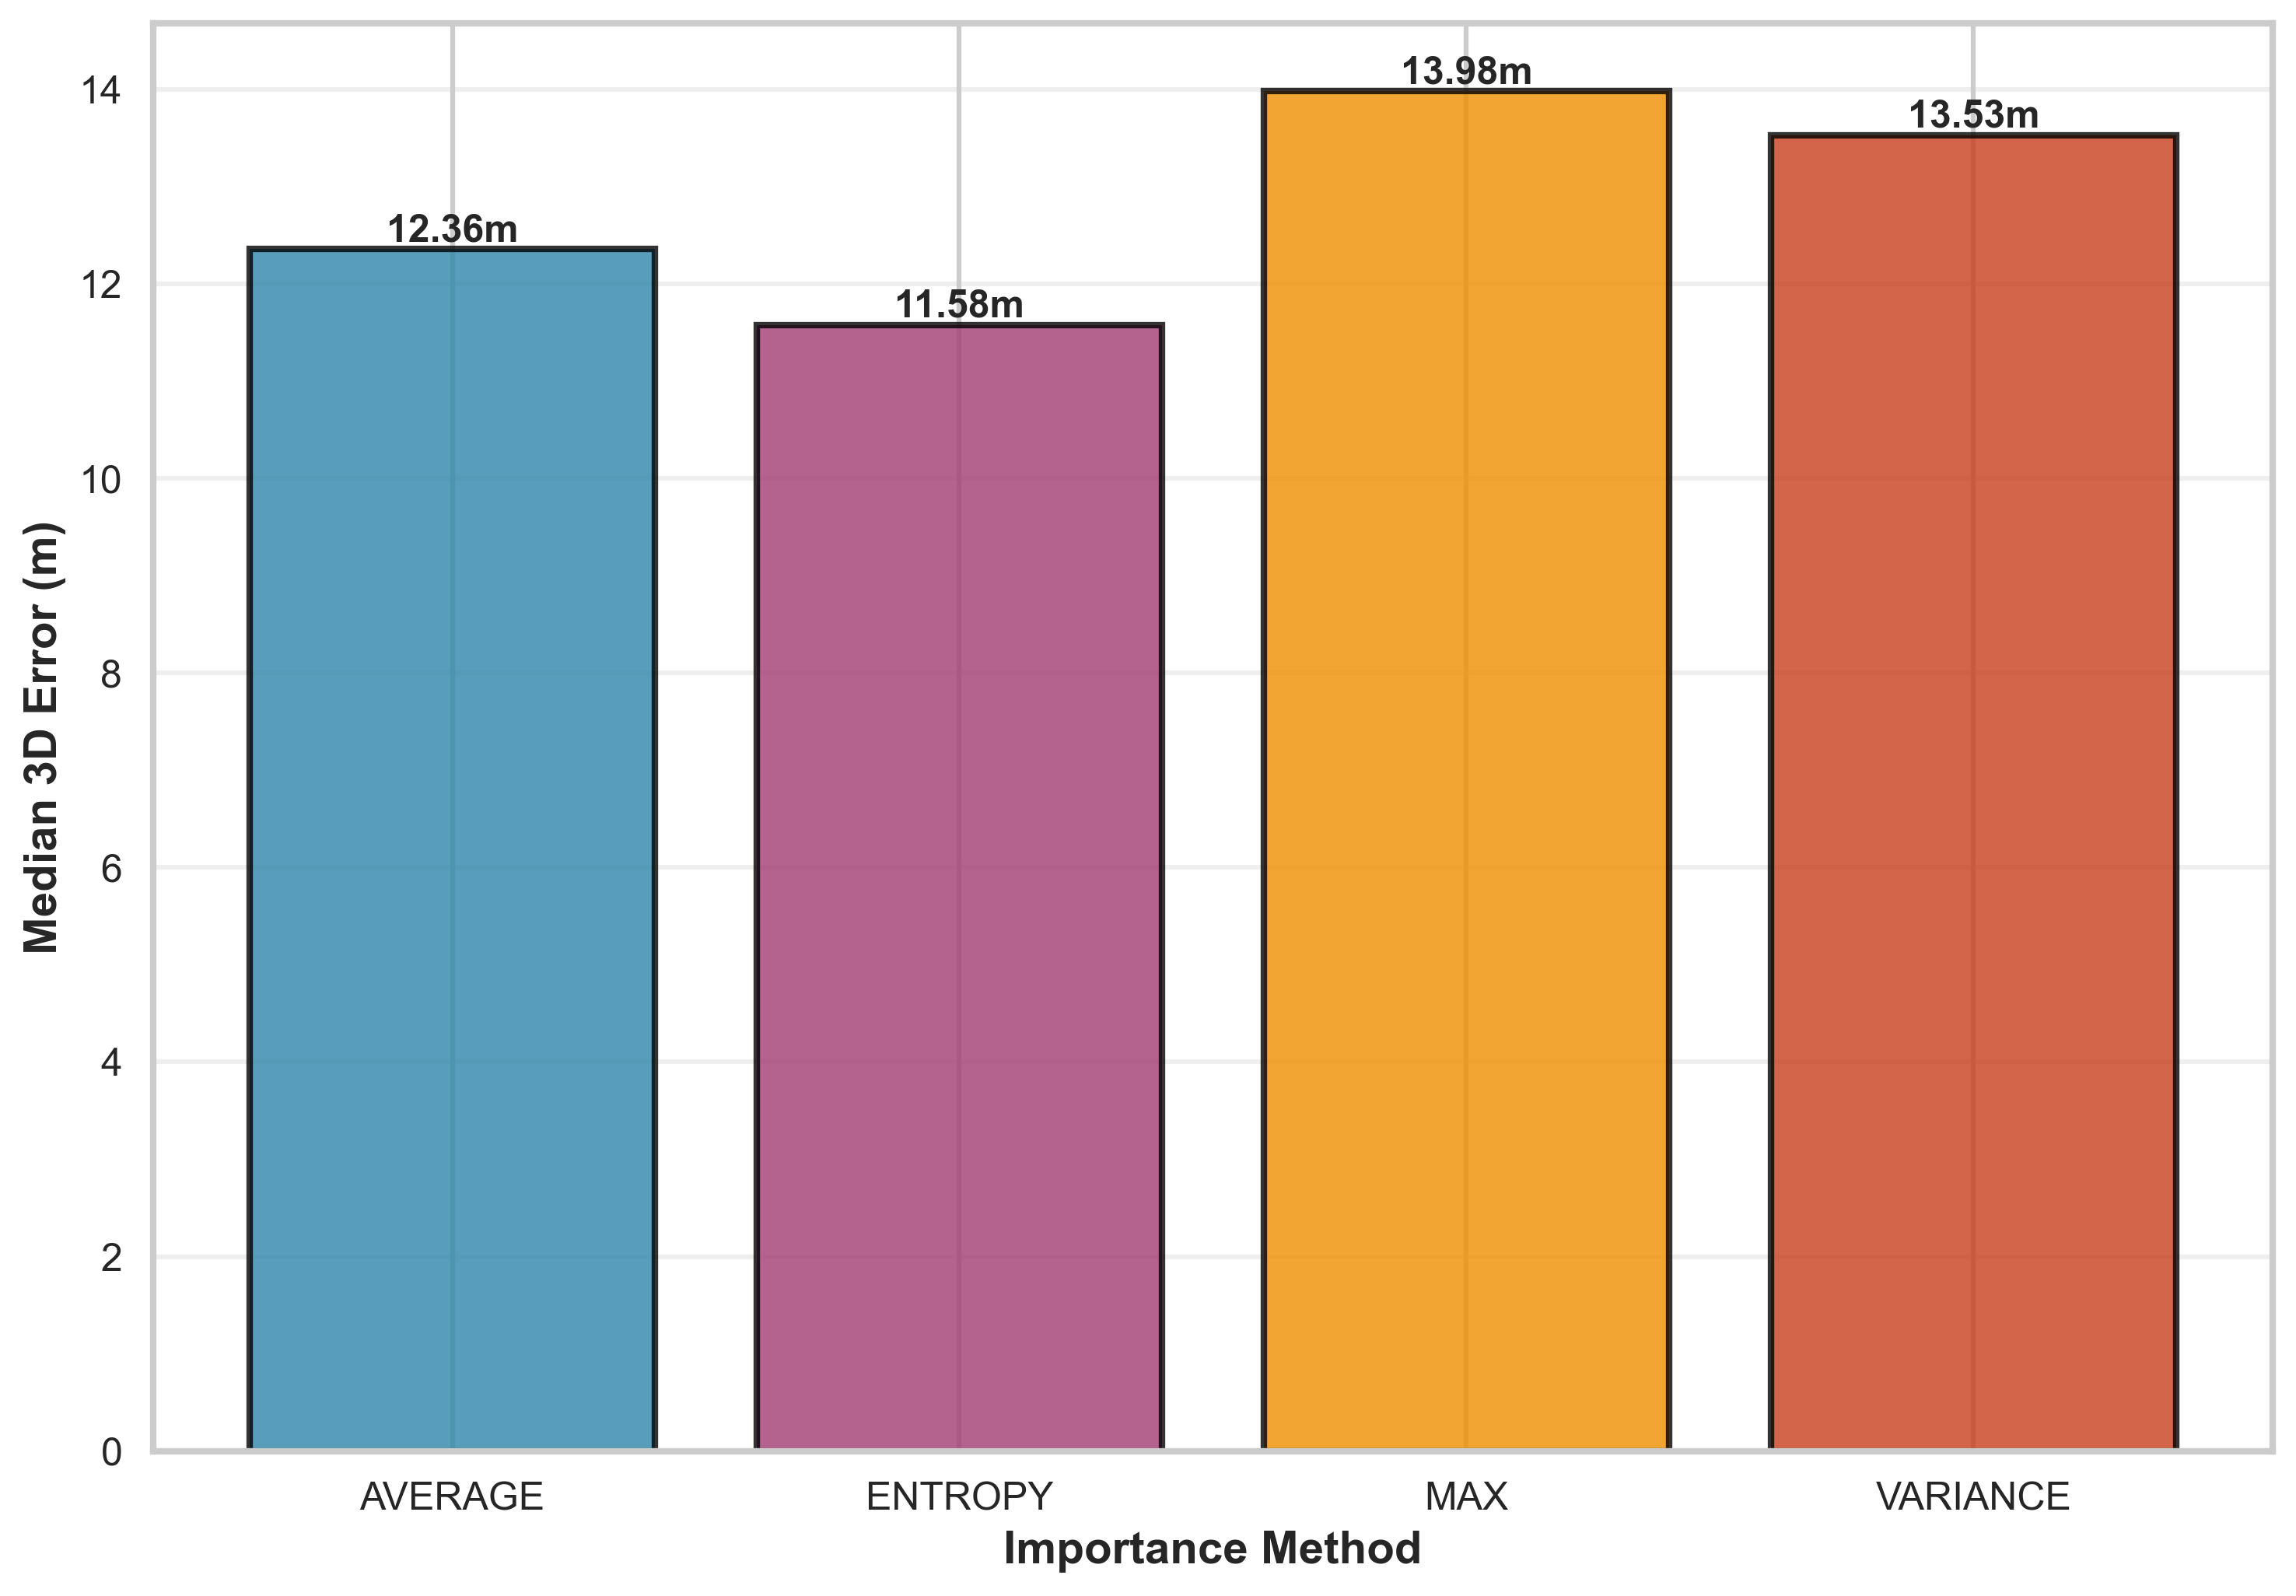

✓ Figure 11 saved: importance_fig11_median_error.png


In [34]:
fig, ax = plt.subplots(figsize=(10, 7))

# Create bar chart
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(k20_df['Importance_Method'], k20_df['Median_3D_Error_m'], 
              color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.2f}m',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_xlabel('Importance Method', fontsize=14, fontweight='bold')
ax.set_ylabel('Median 3D Error (m)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'importance_fig11_median_error.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 11 saved: importance_fig11_median_error.png")

## Figure 12: Floor Classification Accuracy by Importance Method

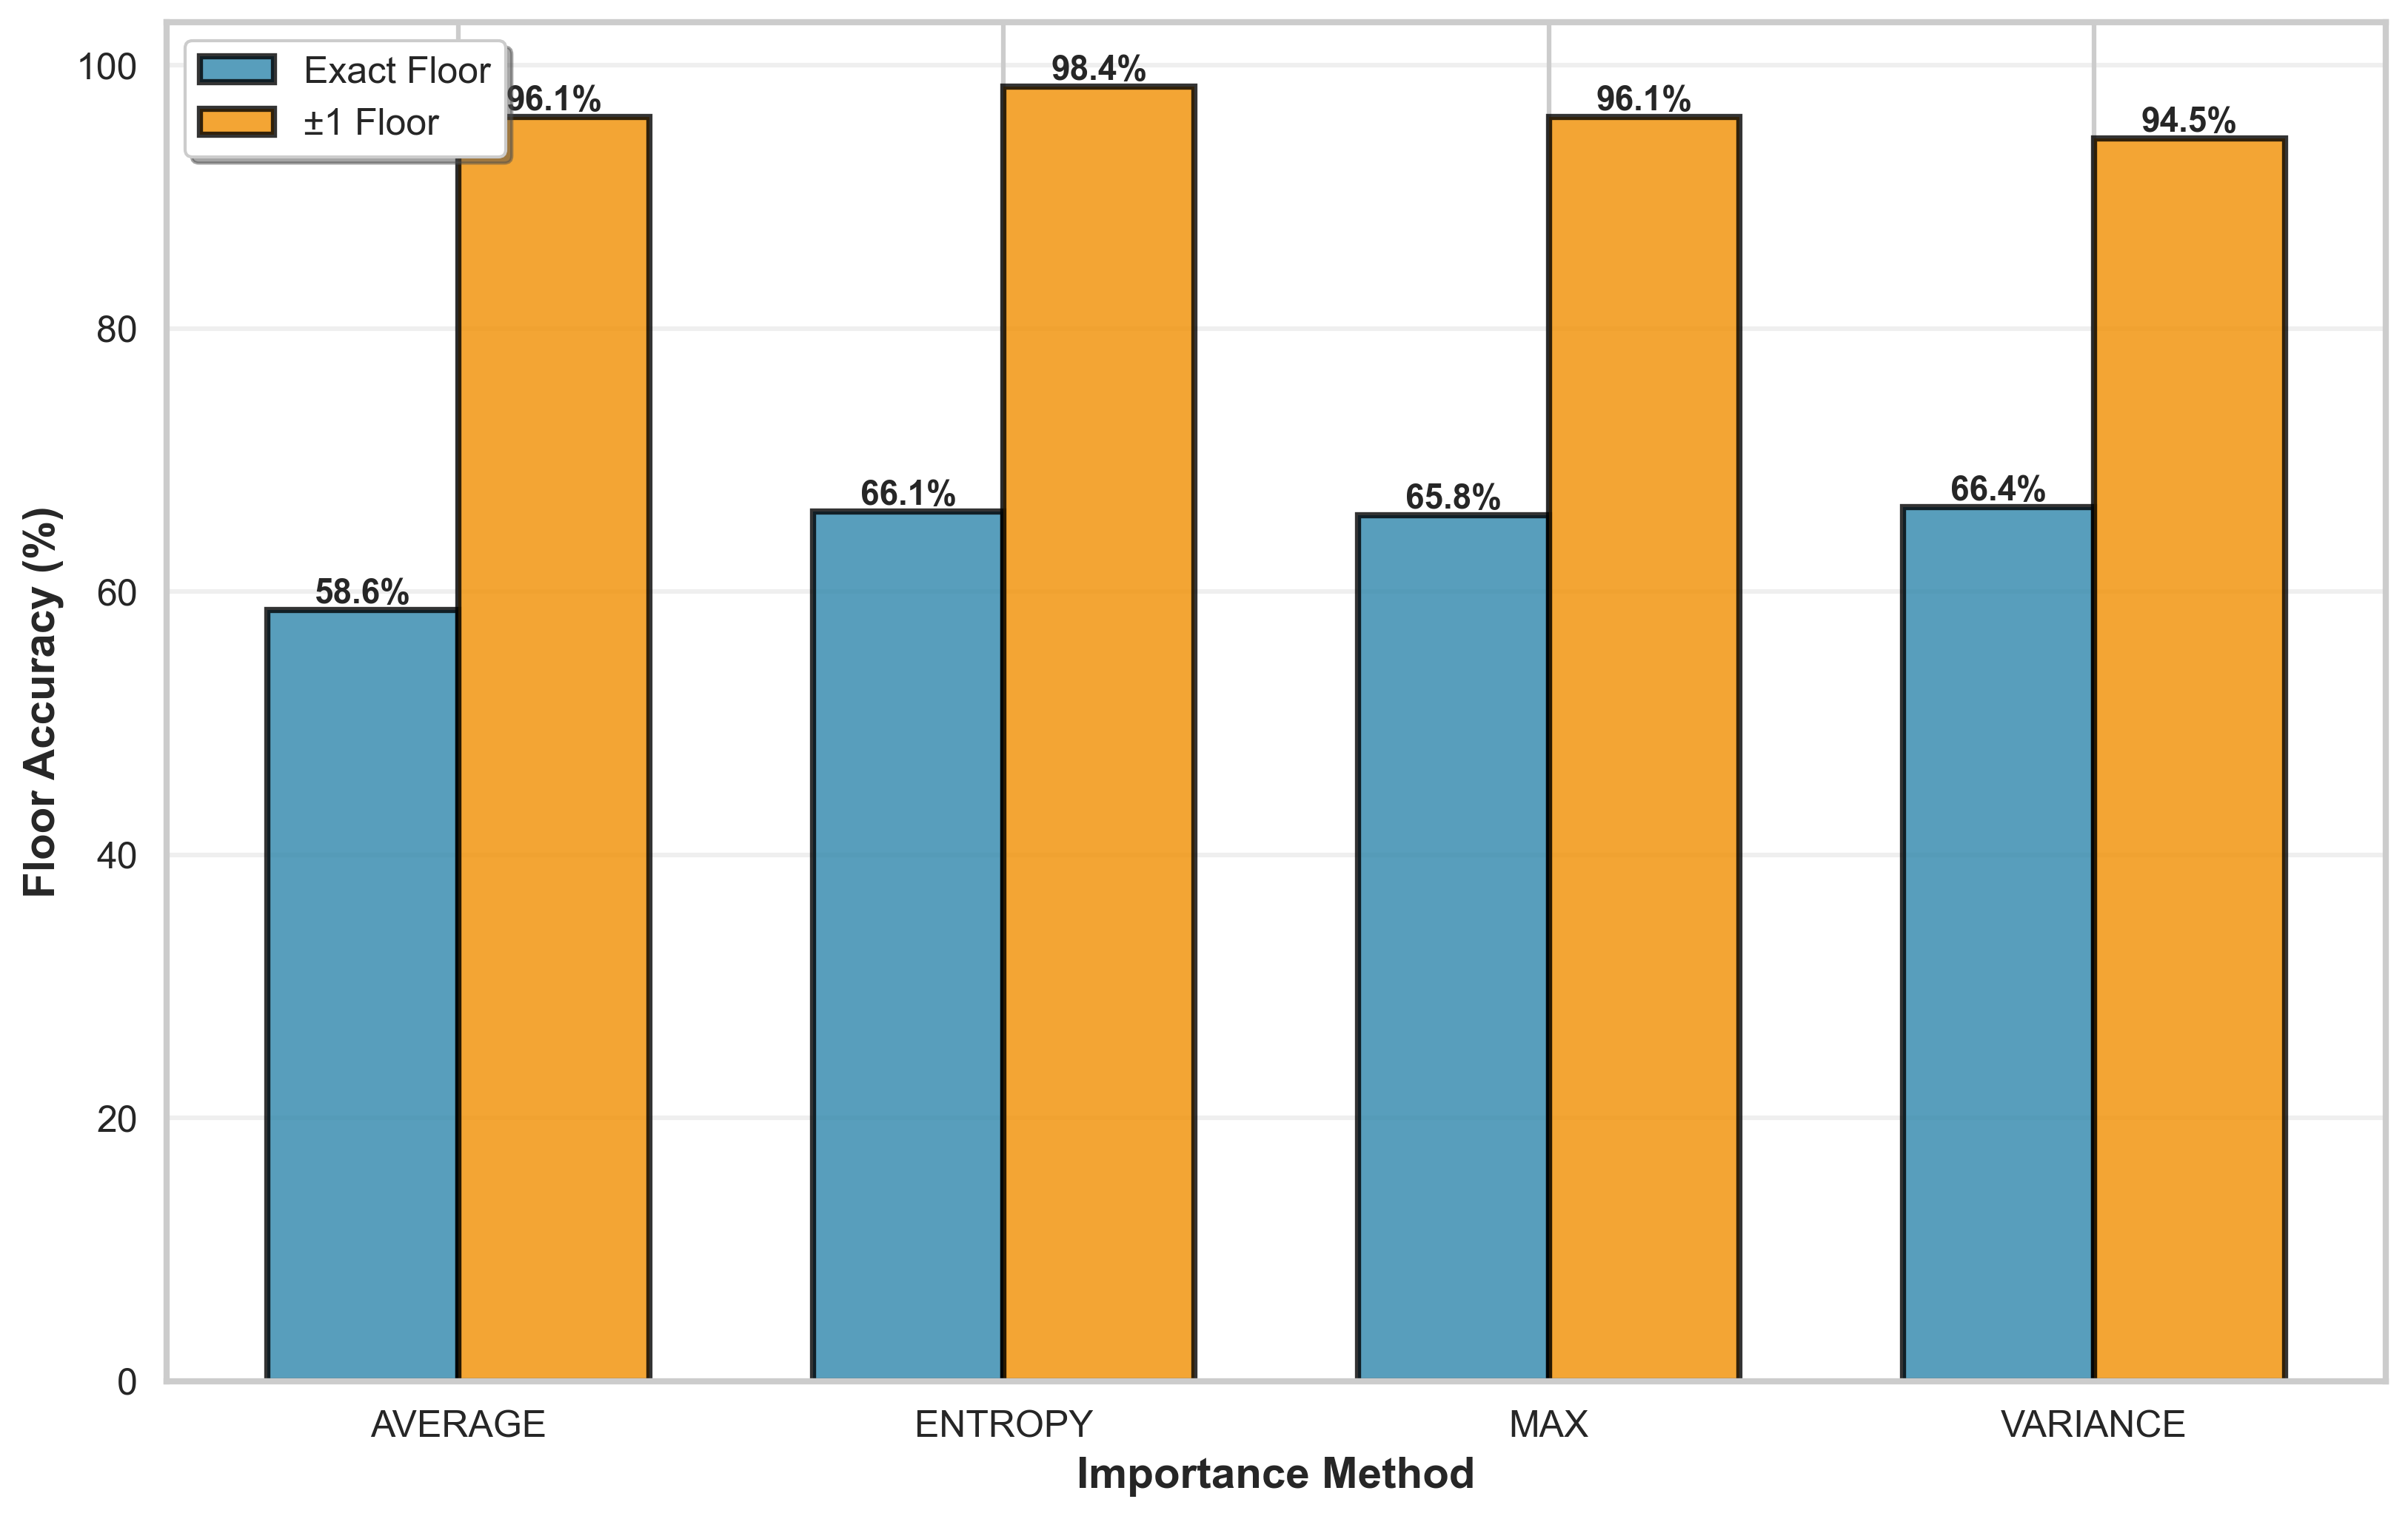

✓ Figure 12 saved: importance_fig12_floor_accuracy.png


In [35]:
fig, ax = plt.subplots(figsize=(11, 7))

# Set up bar positions
x = np.arange(len(k20_df))
width = 0.35

# Create grouped bars
bars1 = ax.bar(x - width/2, k20_df['Floor_Accuracy_Exact_Pct'], width, 
               label='Exact Floor', color='#2E86AB', edgecolor='black', 
               linewidth=2, alpha=0.8)
bars2 = ax.bar(x + width/2, k20_df['Floor_Accuracy_Plus1_Pct'], width, 
               label='±1 Floor', color='#F18F01', edgecolor='black', 
               linewidth=2, alpha=0.8)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Importance Method', fontsize=14, fontweight='bold')
ax.set_ylabel('Floor Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(k20_df['Importance_Method'])
ax.legend(fontsize=12, frameon=True, shadow=True)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'importance_fig12_floor_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 12 saved: importance_fig12_floor_accuracy.png")

## Figure 13: Trade-off Between Positioning Error and Floor Accuracy

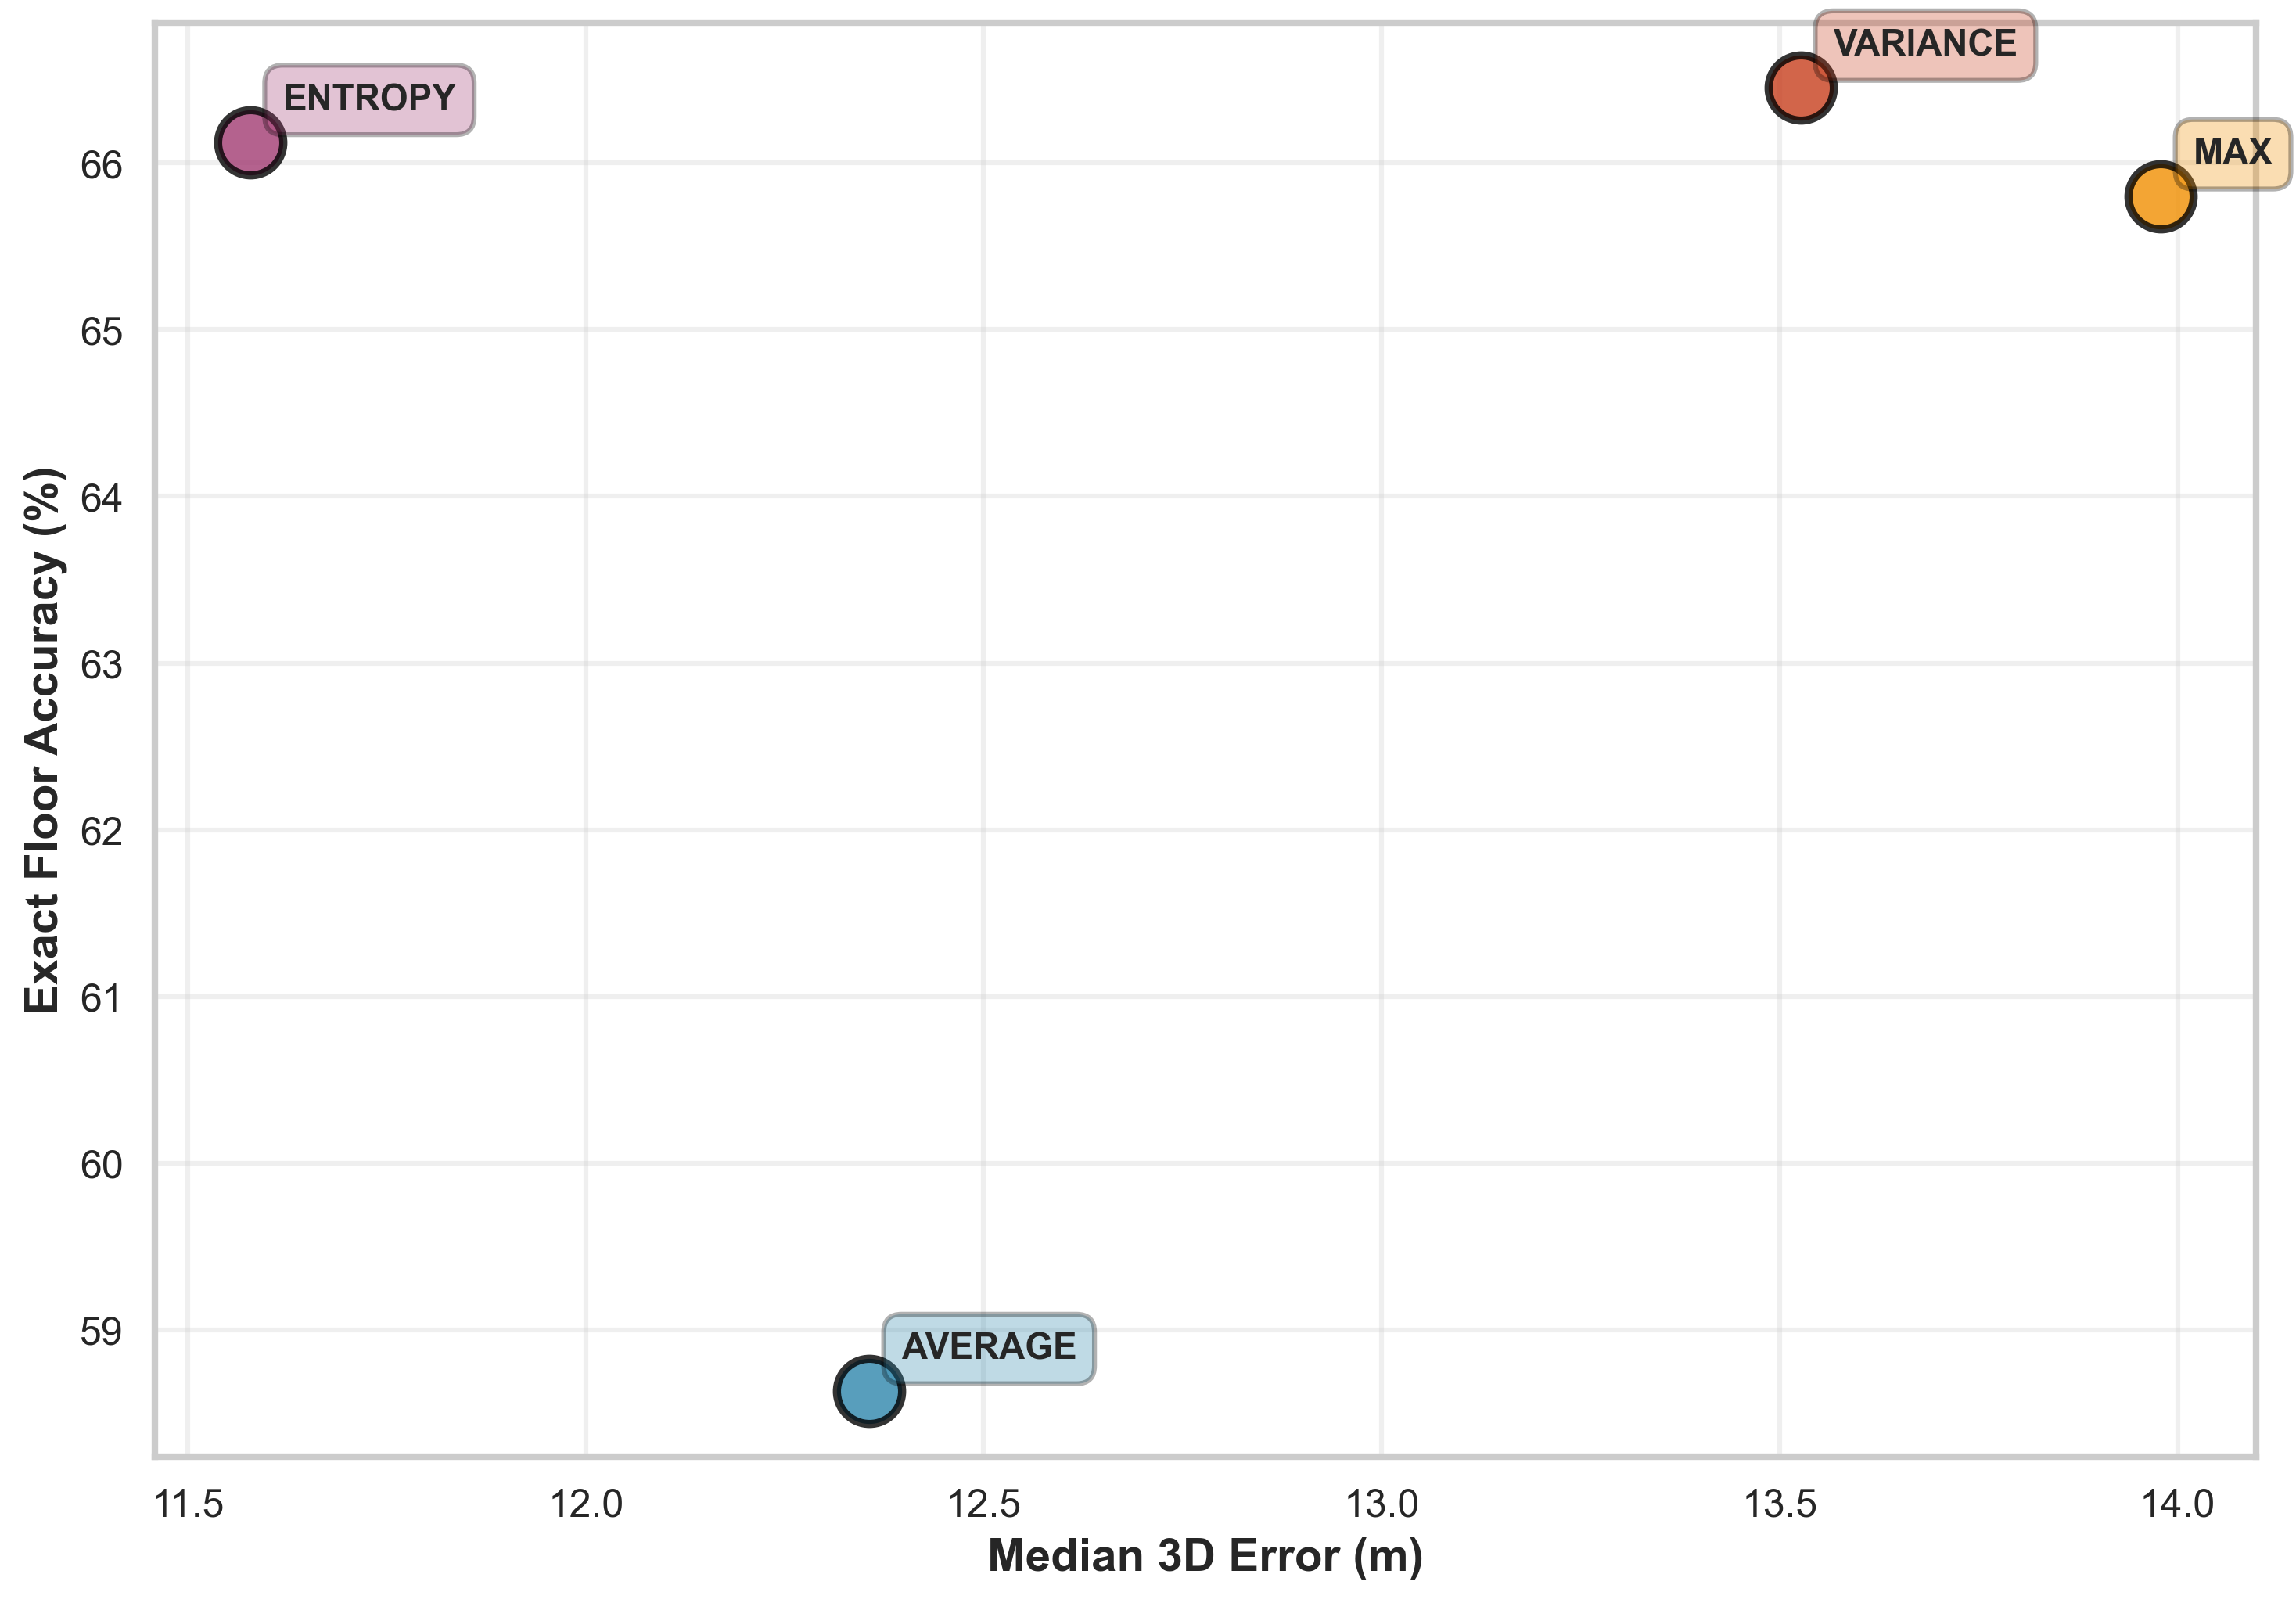

✓ Figure 13 saved: importance_fig13_error_vs_accuracy.png


In [36]:
fig, ax = plt.subplots(figsize=(10, 7))

# Create scatter plot with different colors for each method
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

for idx, (_, row) in enumerate(k20_df.iterrows()):
    ax.scatter(row['Median_3D_Error_m'], row['Floor_Accuracy_Exact_Pct'], 
               s=400, color=colors[idx], edgecolor='black', linewidth=2.5,
               label=row['Importance_Method'], alpha=0.8, zorder=3)
    
    # Add method name annotation
    ax.annotate(row['Importance_Method'], 
                (row['Median_3D_Error_m'], row['Floor_Accuracy_Exact_Pct']),
                xytext=(10, 10), textcoords='offset points',
                fontsize=11, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.5', facecolor=colors[idx], 
                         alpha=0.3, edgecolor='black', linewidth=1.5))

ax.set_xlabel('Median 3D Error (m)', fontsize=14, fontweight='bold')
ax.set_ylabel('Exact Floor Accuracy (%)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'importance_fig13_error_vs_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 13 saved: importance_fig13_error_vs_accuracy.png")

## Figure 14: Comprehensive Performance Comparison (Radar Chart)

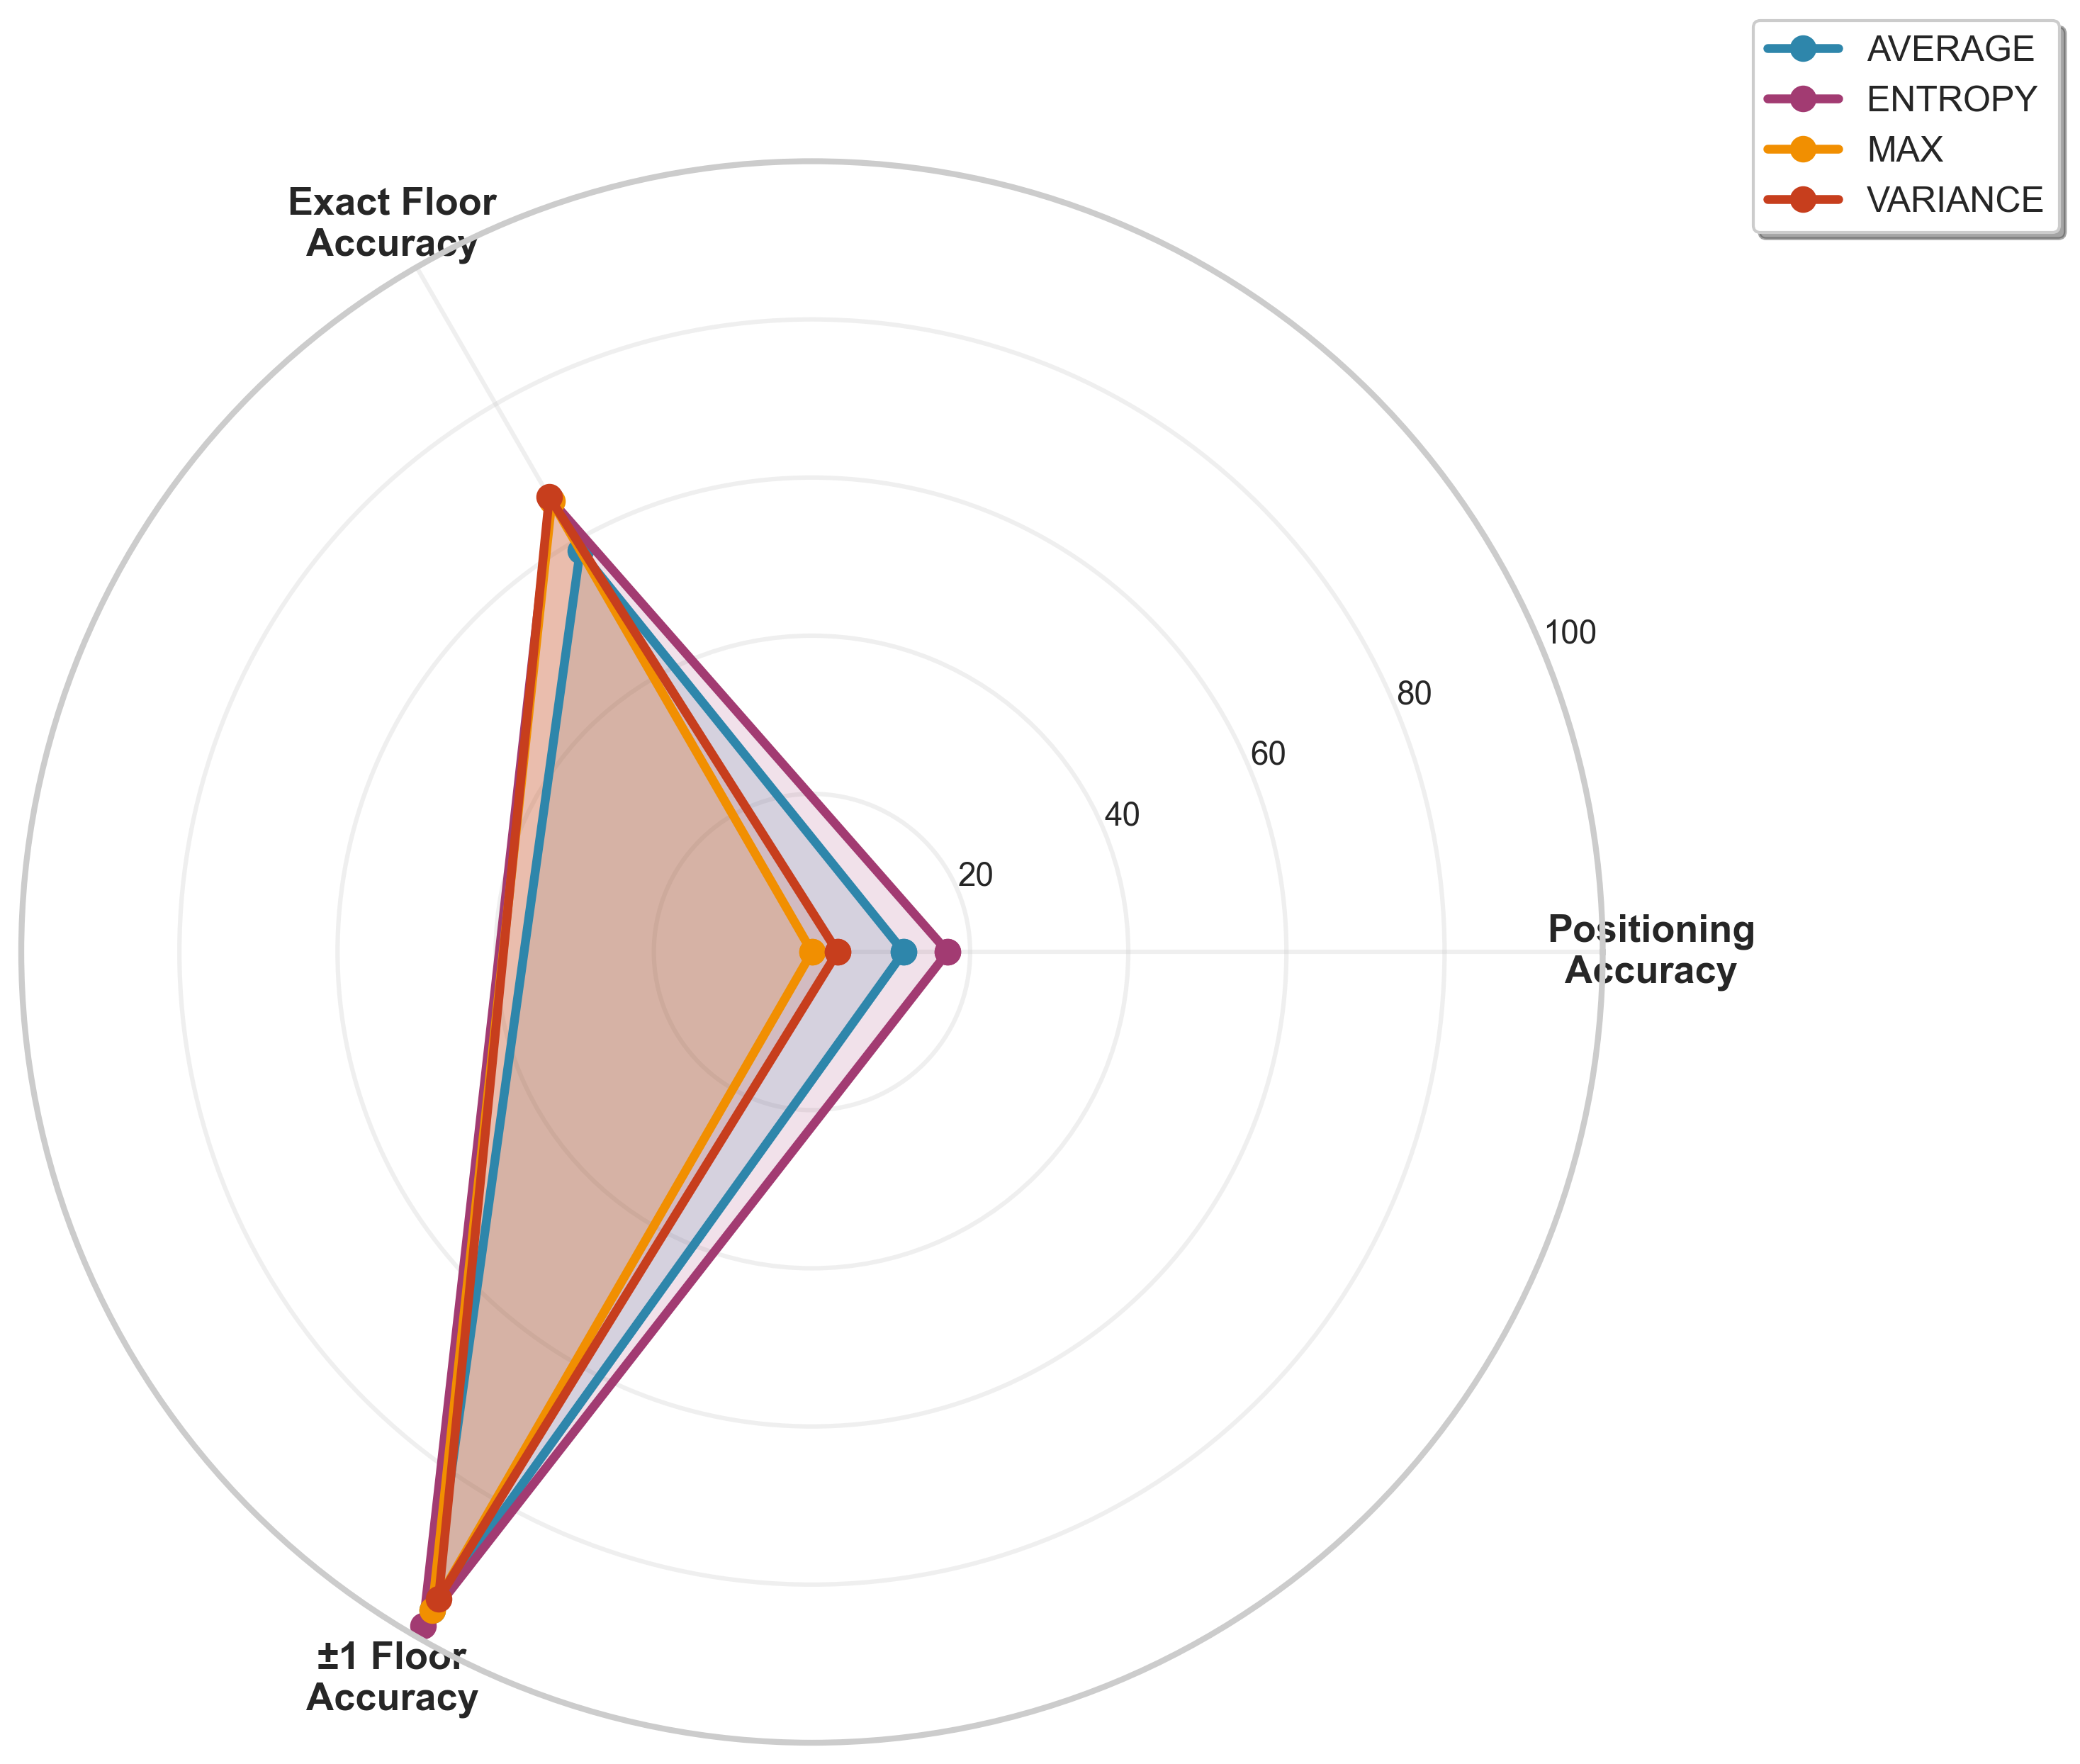

✓ Figure 14 saved: importance_fig14_radar_chart.png


In [37]:
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Metrics to plot (inverted error so higher is better for all metrics)
# Normalize to 0-100 scale
max_error = k20_df['Median_3D_Error_m'].max()
k20_df['Positioning_Score'] = 100 * (1 - k20_df['Median_3D_Error_m'] / max_error)

categories = ['Positioning\nAccuracy', 'Exact Floor\nAccuracy', '±1 Floor\nAccuracy']
num_vars = len(categories)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Plot each importance method
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
for idx, (_, row) in enumerate(k20_df.iterrows()):
    values = [
        row['Positioning_Score'],
        row['Floor_Accuracy_Exact_Pct'],
        row['Floor_Accuracy_Plus1_Pct']
    ]
    values += values[:1]  # Complete the circle
    
    ax.plot(angles, values, 'o-', linewidth=3, 
            label=row['Importance_Method'], color=colors[idx])
    ax.fill(angles, values, alpha=0.15, color=colors[idx])

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=13, fontweight='bold')

# Set radial limits
ax.set_ylim(0, 100)
ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20', '40', '60', '80', '100'], fontsize=11)

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12, 
          frameon=True, shadow=True)

# Add grid
ax.grid(True, linewidth=1.5, alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'importance_fig14_radar_chart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Figure 14 saved: importance_fig14_radar_chart.png")

---
## Summary

In [38]:
print("="*80)
print("VISUALIZATION GENERATION COMPLETE")
print("="*80)
print(f"\nPhase 1 Figures (4 total):")
print(f"  1. Mean 3D Error vs k (different alphas)")
print(f"  2. Floor Accuracy vs alpha (different k values)")
print(f"  3. Heatmap of Mean 3D Error (k vs alpha)")
print(f"  4. Penalty effect (positioning vs floor accuracy)")
print(f"\nPhase 2 Figures (6 total):")
print(f"  5. TTS vs num_sweeps (different num_reads)")
print(f"  6. Success Rate vs num_reads")
print(f"  7. TTS vs beta (different gamma values)")
print(f"  8. Floor Accuracy vs TTS (colored by num_sweeps)")
print(f"  9. Mean 3D Error vs TTS (colored by success rate)")
print(f"  10. Pareto front with best configuration marked")
print(f"\nImportance Metrics Comparison (4 total):")
print(f"  11. Median 3D Error by importance method")
print(f"  12. Floor Accuracy by importance method (grouped bars)")
print(f"  13. Trade-off scatter plot (error vs accuracy)")
print(f"  14. Comprehensive radar chart comparison")
print(f"\nAll figures saved to: {output_dir}")
print(f"  Total figures: 14")
print(f"  Resolution: 300 DPI")
print(f"  Line thickness: 3.0")
print(f"  No titles (as requested)")
print("="*80)

VISUALIZATION GENERATION COMPLETE

Phase 1 Figures (4 total):
  1. Mean 3D Error vs k (different alphas)
  2. Floor Accuracy vs alpha (different k values)
  3. Heatmap of Mean 3D Error (k vs alpha)
  4. Penalty effect (positioning vs floor accuracy)

Phase 2 Figures (6 total):
  5. TTS vs num_sweeps (different num_reads)
  6. Success Rate vs num_reads
  7. TTS vs beta (different gamma values)
  8. Floor Accuracy vs TTS (colored by num_sweeps)
  9. Mean 3D Error vs TTS (colored by success rate)
  10. Pareto front with best configuration marked

Importance Metrics Comparison (4 total):
  11. Median 3D Error by importance method
  12. Floor Accuracy by importance method (grouped bars)
  13. Trade-off scatter plot (error vs accuracy)
  14. Comprehensive radar chart comparison

All figures saved to: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection\data\results\visualizations
  Total figures: 14
  Resolution: 300 DPI
  Line thickness: 3.0
  No titles (as requested)
